In [2]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import Counter
from math import log2

Diagrams for 1000 files per format in ECB mode (1 key per algorithm)

In [3]:
df_ecb_1800_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_all.csv'))
df_ecb_1800_1key

file_name    format   entropy        mean     variance  \
0       file0712.txt.enc   txt_ecb  7.953168  128.467799  5343.516712   
1       file0702.txt.enc   txt_ecb  7.957637  126.868197  5484.109329   
2       file0474.txt.enc   txt_ecb  7.948121  128.093462  5524.150565   
3       file0464.txt.enc   txt_ecb  7.923841  128.062500  5325.930816   
4       file0416.txt.enc   txt_ecb  7.969860  127.728509  5409.310950   
...                  ...       ...       ...         ...          ...   
10795  file0296.html.enc  html_ecb  7.975020  127.501356  5322.031452   
10796  file0205.html.enc  html_ecb  7.940540  129.548953  5344.901544   
10797  file0063.html.enc  html_ecb  7.960428  128.951366  5487.055375   
10798  file0062.html.enc  html_ecb  7.971135  128.986693  5298.546025   
10799  file0204.html.enc  html_ecb  7.980445  128.125106  5501.928852   

         std_dev  skewness  kurtosis  energy        rms  ...  histogram_247  \
0      73.099362 -0.013672 -1.173812  421101  10.332958  ...             21   
1      74.054772  0.026720 -1.208248  498956  10.299057  ...             17   
2      74.324630 -0.035580 -1.201301  469780  10.399258  ...             20   
3      72.978975  0.010116 -1.176344  305348  10.296777  ...              7   
4      73.548018 -0.002922 -1.190564  785092  10.333740  ...             30   
...          ...       ...       ...     ...        ...  ...            ...   
10795  72.952255 -0.010045 -1.177811  785458  10.319319  ...             18   
10796  73.108834 -0.021992 -1.177478  344545  10.299472  ...             18   
10797  74.074661 -0.017170 -1.198135  499521  10.167482  ...             15   
10798  72.791112 -0.021510 -1.178905  697075  10.209198  ...             24   
10799  74.174988  0.001921 -1.202786  989781  10.248302  ...             29   

       histogram_248  histogram_249  histogram_250  histogram_251  \
0                  6             15              8             21   
1                 21             22             31             16   
2                 22             17             22             10   
3                 16              7             18              9   
4                 21             27             28             28   
...              ...            ...            ...            ...   
10795             26             27             35             35   
10796             12             11             11             12   
10797             26             18             24             20   
10798             18             25             23             33   
10799             35             28             55             54   

       histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 18             11             10             18        DES  
1                 10              9             20             18        DES  
2                 19             15             21             16        DES  
3                 13             12             11             16        DES  
4                 42             32             33             25        DES  
...              ...            ...            ...            ...        ...  
10795             22             26             36             34        AES  
10796             13             19              7              8        AES  
10797             24             21             21             23        AES  
10798             18             18             28             31        AES  
10799             42             48             27             42        AES  

[10800 rows x 267 columns]

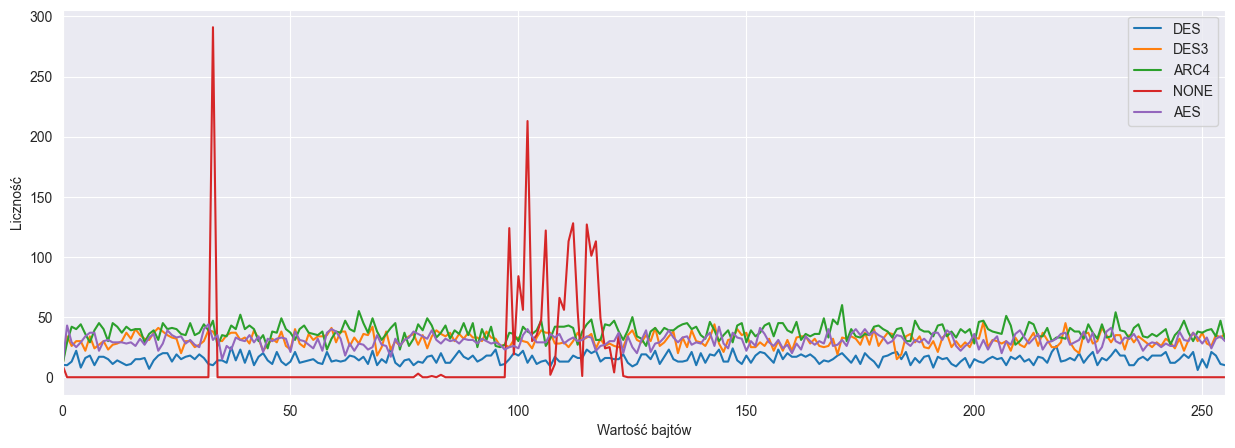

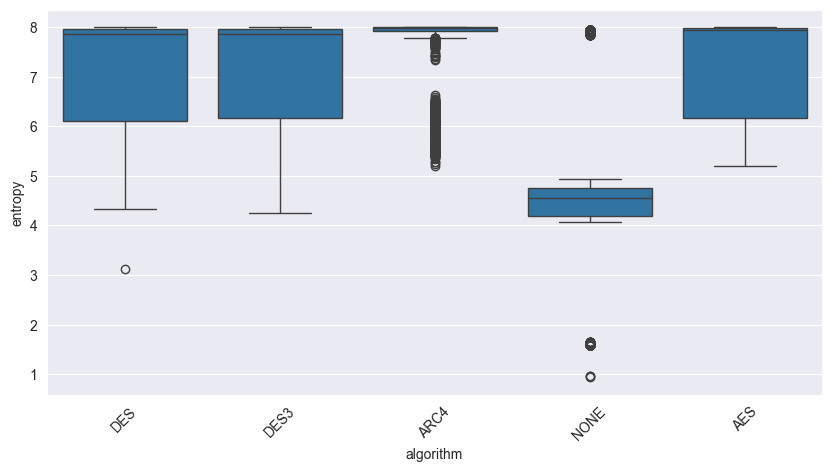

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_ecb_1800_1key["algorithm"].unique()):
    subset = df_ecb_1800_1key[df_ecb_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików (1800 plików na format, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_ecb_1800_1key["algorithm"], y=df_ecb_1800_1key["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie ECB dla różnych algorytmów i wszystkich formatów plików 1800 plików na format, jeden klucz szyfrujący")
plt.show()

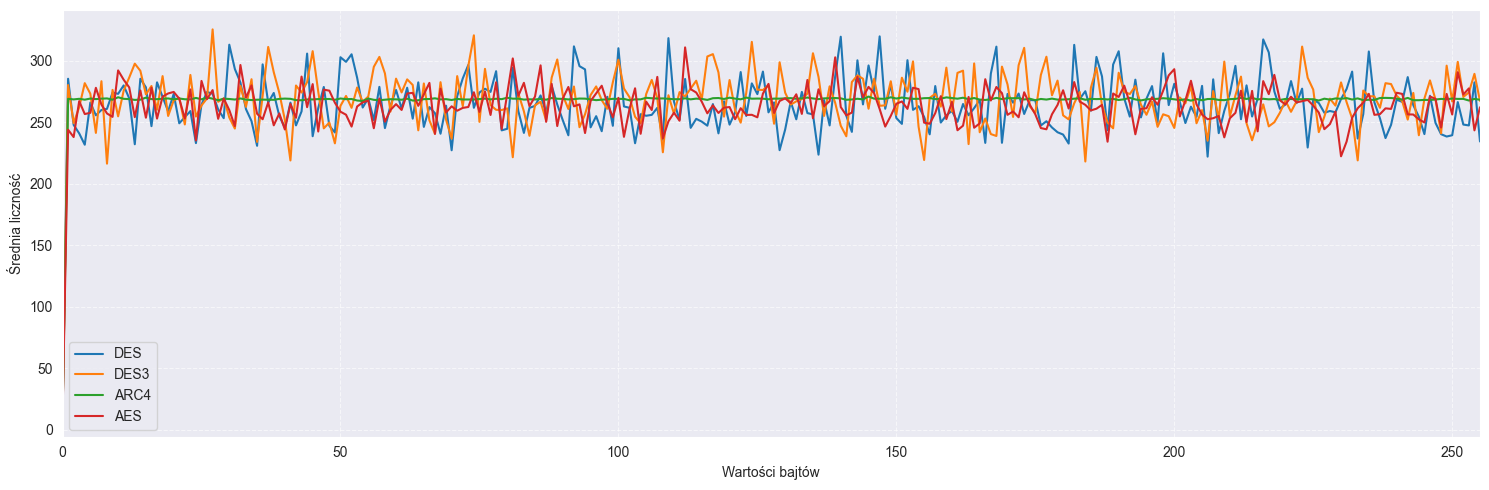

In [4]:
import matplotlib.pyplot as plt

algorithms = df_ecb_1800_1key["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_ecb_1800_1key[df_ecb_1800_1key["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Data frame with 1000 files *.bmp encrypted in ECB mode using 1 key - features


In [5]:
df_bmp_ecb_1800_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_bmp_ecb.csv'))
df_bmp_ecb_1800_1key

file_name   format   entropy        mean     variance  \
0     image_0416.bmp.enc  bmp_ecb  4.557362  130.337035  5598.267866   
1     image_0406.bmp.enc  bmp_ecb  4.399548  120.503575  6792.518093   
2     image_0608.bmp.enc  bmp_ecb  4.631574  118.010941  5094.757348   
3     image_0618.bmp.enc  bmp_ecb  4.422222  119.673138  5828.324137   
4     image_0382.bmp.enc  bmp_ecb  4.589223  121.089719  7298.401729   
...                  ...      ...       ...         ...          ...   
1795  image_0083.bmp.enc  bmp_ecb  5.581048  127.647076  4912.640535   
1796  image_0234.bmp.enc  bmp_ecb  5.583723  122.624572  6109.238212   
1797  image_0224.bmp.enc  bmp_ecb  5.572797  120.841766  6268.546703   
1798  image_0152.bmp.enc  bmp_ecb  5.567197  139.311416  5338.232134   
1799  image_0142.bmp.enc  bmp_ecb  5.620130  140.311561  5803.055662   

        std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0     74.821574 -0.030134 -1.294663  27680202  10.180684  ...              1   
1     82.416734  0.119065 -1.385946  18630892   9.645292  ...              0   
2     71.377569  0.211916 -0.978766  26369822   9.767667  ...              0   
3     76.343462 -0.162947 -1.384458  18760704   9.192640  ...              0   
4     85.430684  0.247659 -1.311070  14624286   8.490698  ...              0   
...         ...       ...       ...       ...        ...  ...            ...   
1795  70.090231 -0.090928 -1.063942   7358935  11.089493  ...              1   
1796  78.161616  0.139292 -1.297396   6542231  10.579816  ...              1   
1797  79.174154  0.157438 -1.497099  12737001  11.225822  ...           2104   
1798  73.063206 -0.375527 -0.914105  14841951  10.572377  ...           2730   
1799  76.177790 -0.176288 -1.318484  16753249  10.309779  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0             11026          11324              1              0   
1                 0              0              0              0   
2               303              0              0          11516   
3                 0              2              0              0   
4              8450           8450              0           8449   
...             ...            ...            ...            ...   
1795              0              0              0              0   
1796           2329             35              1             70   
1797              1              0              0              0   
1798            105              2              0              0   
1799            229              0           3206              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0              0              0              0        DES  
1                 0              0           8256              0        DES  
2                 0              0              0              1        DES  
3                 0              0              0              0        DES  
4              8450              0              0              0        DES  
...             ...            ...            ...            ...        ...  
1795              0           1199              0              0        AES  
1796              0             34           1148             35        AES  
1797              0              0              0           2013        AES  
1798              0           2731            105              0        AES  
1799              0           3207              1           3206        AES  

[1800 rows x 267 columns]

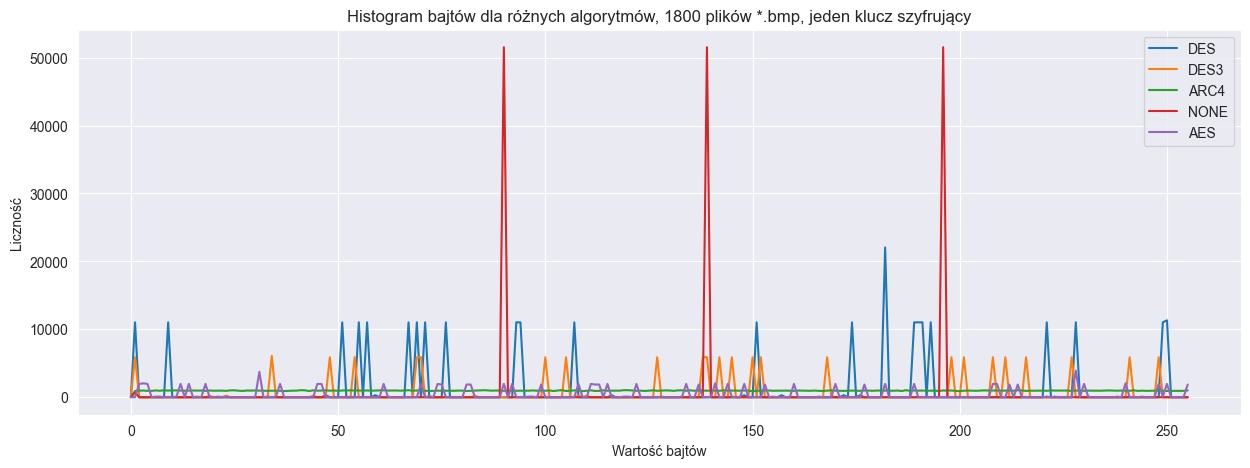

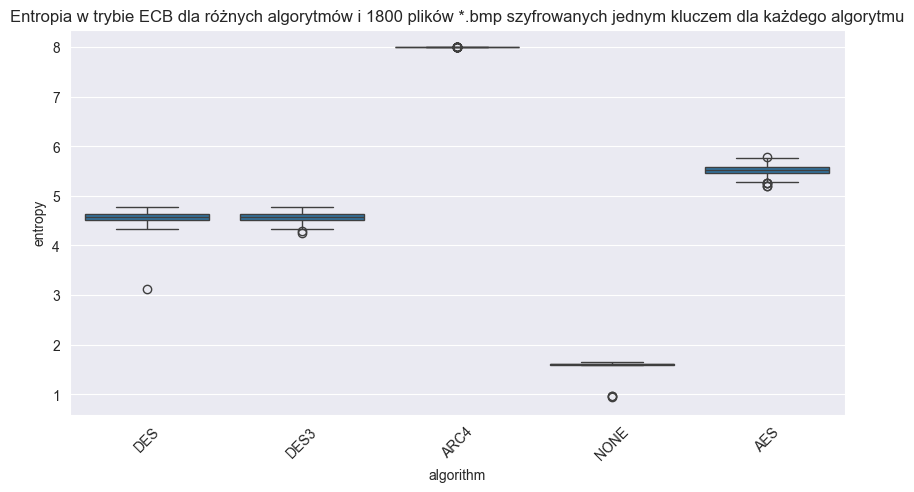

In [7]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_ecb_1800_1key["algorithm"].unique()):
    subset = df_bmp_ecb_1800_1key[df_bmp_ecb_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.bmp, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_ecb_1800_1key["algorithm"], y=df_bmp_ecb_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.bmp szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [6]:
df_csv_ecb_1800_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_csv_ecb.csv'))
df_csv_ecb_1800_1key

file_name   format   entropy        mean     variance    std_dev  \
0     file0715.csv.enc  csv_ecb  6.485926  123.258929  4951.209742  70.364833   
1     file0705.csv.enc  csv_ecb  5.812500  135.687500  5461.714844  73.903416   
2     file0473.csv.enc  csv_ecb  6.194236  127.125000  4992.692708  70.658989   
3     file0463.csv.enc  csv_ecb  5.414498  140.642857  5436.015306  73.729338   
4     file0385.csv.enc  csv_ecb  6.319236  125.500000  5760.479167  75.897821   
...                ...      ...       ...         ...          ...        ...   
1795  file0127.csv.enc  csv_ecb  5.695160  118.687500  5292.027344  72.746322   
1796  file0251.csv.enc  csv_ecb  5.812500  116.515625  6421.499756  80.134261   
1797  file0329.csv.enc  csv_ecb  5.738205  131.046875  5472.544678  73.976650   
1798  file0241.csv.enc  csv_ecb  6.550705  129.960938  5299.896912  72.800391   
1799  file0339.csv.enc  csv_ecb  5.987492  129.500000  5699.750000  75.496689   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.050519 -1.036635   11517  10.140530  ...              0   
1    -0.129182 -1.351832    7988  11.171951  ...              0   
2    -0.044286 -1.111141    8588   9.458242  ...              0   
3    -0.374169 -1.154344    6680  10.921800  ...              0   
4     0.030443 -1.245533   10886  10.648748  ...              0   
...        ...       ...     ...        ...  ...            ...   
1795  0.110168 -1.008665    6576  10.136567  ...              0   
1796  0.128721 -1.463042    7001  10.458997  ...              0   
1797 -0.010506 -1.287431    7029  10.479891  ...              0   
1798  0.025708 -1.211846   13791  10.379893  ...              1   
1799  0.036992 -1.366767    7904   9.939819  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0              1              2              0   
1                 1              0              1              0   
2                 1              0              0              0   
3                 0              0              0              0   
4                 0              0              1              0   
...             ...            ...            ...            ...   
1795              0              3              1              0   
1796              0              0              1              0   
1797              0              0              0              1   
1798              1              2              1              0   
1799              0              0              0              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0              0              0              0        DES  
1                 0              0              0              0        DES  
2                 2              0              0              0        DES  
3                 1              0              0              0        DES  
4                 0              1              1              0        DES  
...             ...            ...            ...            ...        ...  
1795              0              0              0              0        AES  
1796              1              0              0              0        AES  
1797              0              0              0              0        AES  
1798              2              0              0              0        AES  
1799              1              0              0              1        AES  

[1800 rows x 267 columns]

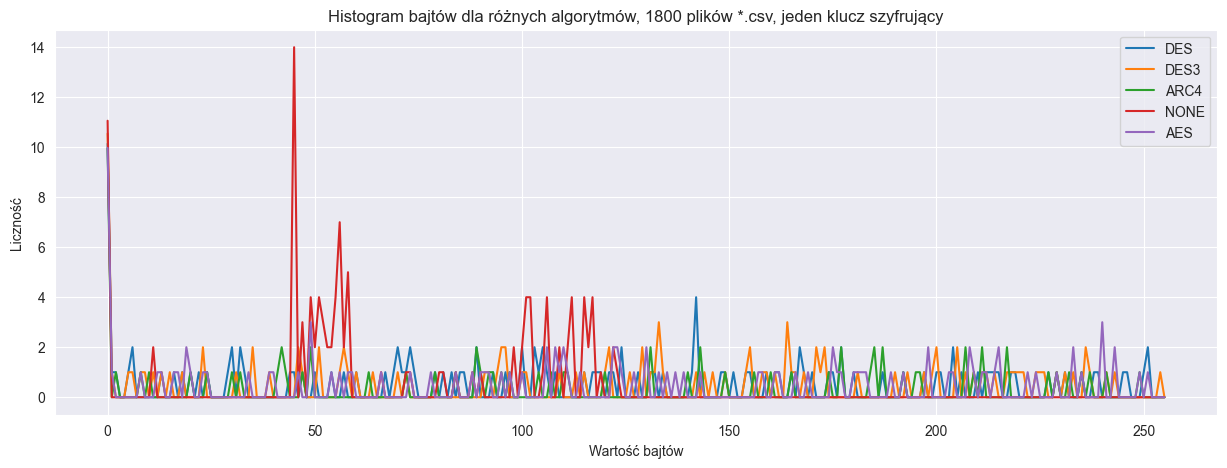

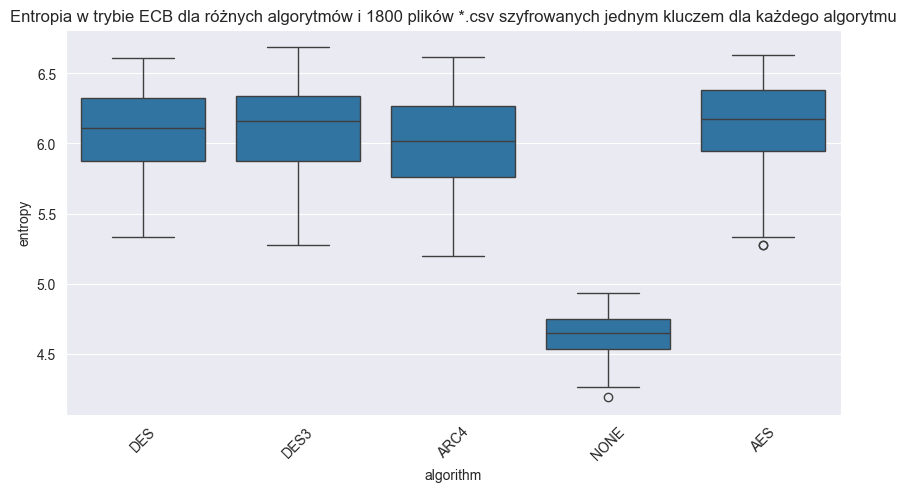

In [9]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_ecb_1800_1key["algorithm"].unique()):
    subset = df_csv_ecb_1800_1key[df_csv_ecb_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.csv, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_ecb_1800_1key["algorithm"], y=df_csv_ecb_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.csv szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [7]:
df_html_ecb_1800_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_html_ecb.csv'))
df_html_ecb_1800_1key

file_name    format   entropy        mean     variance  \
0     file0674.html.enc  html_ecb  7.925176  126.920244  5522.899381   
1     file0412.html.enc  html_ecb  7.894131  127.193015  5504.276164   
2     file0413.html.enc  html_ecb  7.968920  127.068799  5399.957361   
3     file0675.html.enc  html_ecb  7.952570  126.493839  5253.152686   
4     file0588.html.enc  html_ecb  7.959275  128.172414  5275.261653   
...                 ...       ...       ...         ...          ...   
1795  file0296.html.enc  html_ecb  7.975020  127.501356  5322.031452   
1796  file0205.html.enc  html_ecb  7.940540  129.548953  5344.901544   
1797  file0063.html.enc  html_ecb  7.960428  128.951366  5487.055375   
1798  file0062.html.enc  html_ecb  7.971135  128.986693  5298.546025   
1799  file0204.html.enc  html_ecb  7.980445  128.125106  5501.928852   

        std_dev  skewness  kurtosis  energy        rms  ...  histogram_247  \
0     74.316212  0.002724 -1.184876  366145  10.304880  ...             14   
1     74.190809  0.008000 -1.207914  228322  10.243407  ...              8   
2     73.484402  0.015836 -1.168992  957478  10.241807  ...             34   
3     72.478636  0.019836 -1.169227  656078  10.313488  ...             23   
4     72.630997 -0.003537 -1.162481  625746  10.386878  ...             26   
...         ...       ...       ...     ...        ...  ...            ...   
1795  72.952255 -0.010045 -1.177811  785458  10.319319  ...             18   
1796  73.108834 -0.021992 -1.177478  344545  10.299472  ...             18   
1797  74.074661 -0.017170 -1.198135  499521  10.167482  ...             15   
1798  72.791112 -0.021510 -1.178905  697075  10.209198  ...             24   
1799  74.174988  0.001921 -1.202786  989781  10.248302  ...             29   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                15             14             21             10   
1                 6              6             14             12   
2                36             44             34             35   
3                15             20             25             23   
4                14             17             27             18   
...             ...            ...            ...            ...   
1795             26             27             35             35   
1796             12             11             11             12   
1797             26             18             24             20   
1798             18             25             23             33   
1799             35             28             55             54   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                14             12             22              9        DES  
1                 5              9              8              9        DES  
2                35             34             40             31        DES  
3                16             20             27             13        DES  
4                24             14             28             17        DES  
...             ...            ...            ...            ...        ...  
1795             22             26             36             34        AES  
1796             13             19              7              8        AES  
1797             24             21             21             23        AES  
1798             18             18             28             31        AES  
1799             42             48             27             42        AES  

[1800 rows x 267 columns]

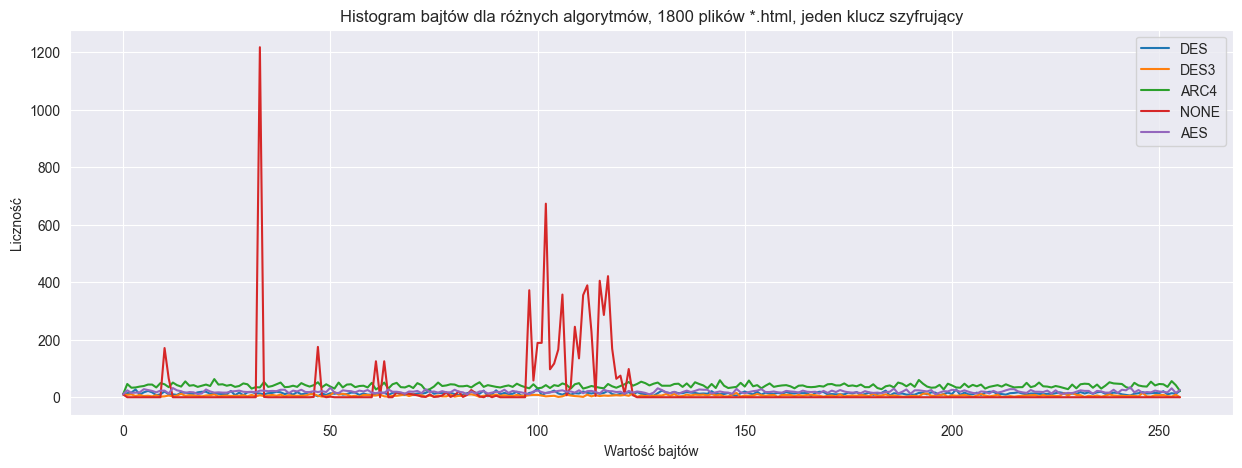

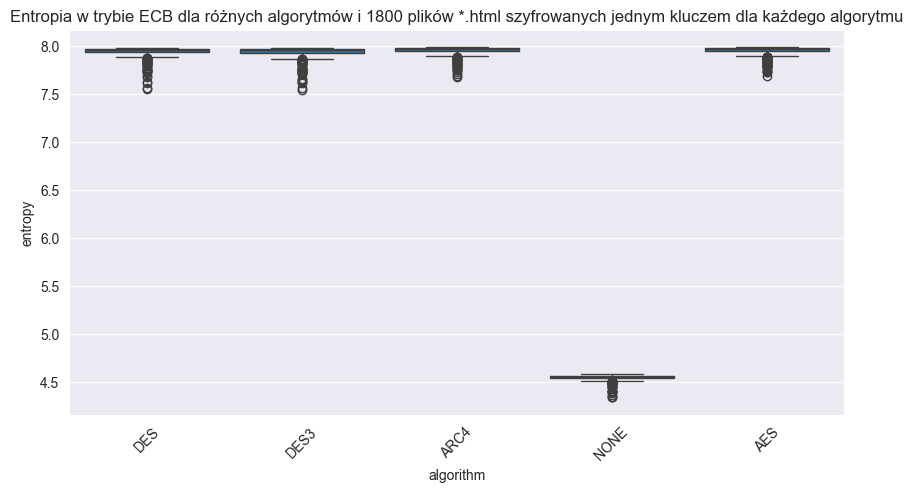

In [11]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_ecb_1800_1key["algorithm"].unique()):
    subset = df_html_ecb_1800_1key[df_html_ecb_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.html, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_ecb_1800_1key["algorithm"], y=df_html_ecb_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.html szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [8]:
df_pyth_ecb_1800_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_pyth_ecb.csv'))
df_pyth_ecb_1800_1key

file_name    format   entropy        mean     variance    std_dev  \
0     file0380.py.enc  pyth_ecb  7.849944  129.516170  5237.389784  72.369813   
1     file0666.py.enc  pyth_ecb  7.856157  128.957815  5293.139872  72.753968   
2     file0605.py.enc  pyth_ecb  7.839225  130.238804  5272.457287  72.611688   
3     file0705.py.enc  pyth_ecb  7.848194  129.318302  5414.022026  73.580038   
4     file0678.py.enc  pyth_ecb  7.844022  129.209412  5188.171037  72.028960   
...               ...       ...       ...         ...          ...        ...   
1795  file0075.py.enc  pyth_ecb  7.978720  128.525788  5462.182668  73.906581   
1796  file0108.py.enc  pyth_ecb  7.954882  129.466479  5495.877769  74.134188   
1797  file0008.py.enc  pyth_ecb  7.790276  126.814693  5458.126846  73.879137   
1798  file0116.py.enc  pyth_ecb  7.970724  128.339264  5479.150867  74.021287   
1799  file0016.py.enc  pyth_ecb  7.819566  128.715625  5486.472256  74.070725   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.041211 -1.144318  778521  10.462592  ...             47   
1    -0.008360 -1.147465  492882  10.460978  ...             31   
2    -0.045314 -1.127649  762689  10.396675  ...             65   
3    -0.017686 -1.184522  332396  10.498137  ...             16   
4    -0.011551 -1.126162  437345  10.435547  ...             22   
...        ...       ...     ...        ...  ...            ...   
1795 -0.021588 -1.207790  930061  10.234090  ...             37   
1796 -0.019082 -1.228120  475171  10.137154  ...             28   
1797  0.054328 -1.208826   96661  10.295044  ...              6   
1798 -0.006915 -1.202634  693925  10.272481  ...             32   
1799 -0.013352 -1.243152  101425  10.278669  ...              3   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                34             28             24             19   
1                16             13             11             26   
2                15             18             27             32   
3                10              9              7             11   
4                12             16             13             13   
...             ...            ...            ...            ...   
1795             35             33             43             22   
1796             13             17             17             12   
1797              2              2              4              3   
1798             31             25             27             29   
1799              2              2              7              2   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                26             17              8             22        DES  
1                13             12             10             20        DES  
2                21             23             21             44        DES  
3                12              7              6             15        DES  
4                14             12             11             17        DES  
...             ...            ...            ...            ...        ...  
1795             28             34             42             31        AES  
1796             15             11             21             25        AES  
1797              2              0              2             12        AES  
1798             16             30             25             29        AES  
1799              3              3              5              3        AES  

[1800 rows x 267 columns]

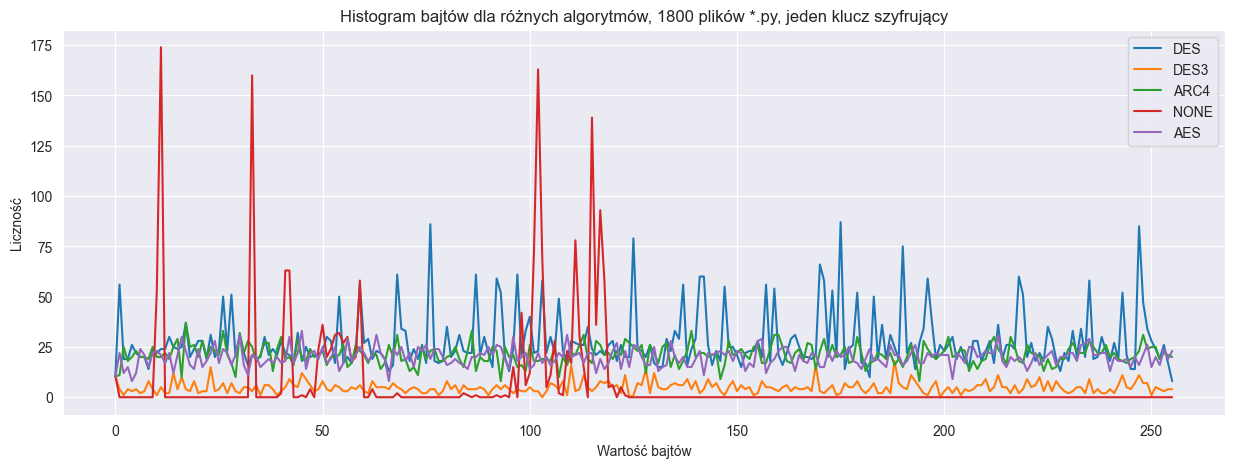

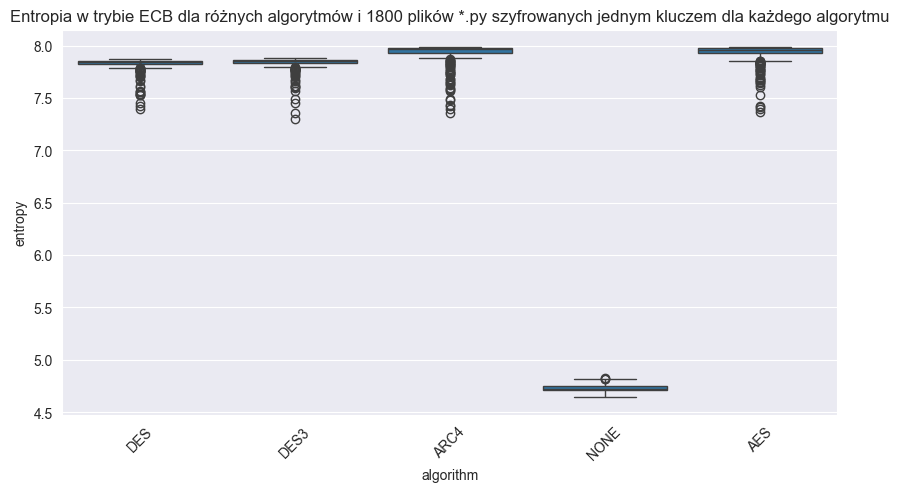

In [50]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_ecb_1800_1key["algorithm"].unique()):
    subset = df_pyth_ecb_1800_1key[df_pyth_ecb_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.py, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_ecb_1800_1key["algorithm"], y=df_pyth_ecb_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.py szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [9]:
df_txt_ecb_1800_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_txt_ecb.csv'))
df_txt_ecb_1800_1key

file_name   format   entropy        mean     variance    std_dev  \
0     file0712.txt.enc  txt_ecb  7.953168  128.467799  5343.516712  73.099362   
1     file0702.txt.enc  txt_ecb  7.957637  126.868197  5484.109329  74.054772   
2     file0474.txt.enc  txt_ecb  7.948121  128.093462  5524.150565  74.324630   
3     file0464.txt.enc  txt_ecb  7.923841  128.062500  5325.930816  72.978975   
4     file0416.txt.enc  txt_ecb  7.969860  127.728509  5409.310950  73.548018   
...                ...      ...       ...         ...          ...        ...   
1795  file0058.txt.enc  txt_ecb  7.914191  124.413462  5585.867511  74.738661   
1796  file0256.txt.enc  txt_ecb  7.978942  125.857159  5468.802665  73.951353   
1797  file0246.txt.enc  txt_ecb  7.977968  126.755863  5483.181658  74.048509   
1798  file0189.txt.enc  txt_ecb  7.963182  128.828776  5504.094597  74.189586   
1799  file0199.txt.enc  txt_ecb  7.875156  130.146577  5521.340866  74.305726   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.013672 -1.173812  421101  10.332958  ...             21   
1     0.026720 -1.208248  498956  10.299057  ...             17   
2    -0.035580 -1.201301  469780  10.399258  ...             20   
3     0.010116 -1.176344  305348  10.296777  ...              7   
4    -0.002922 -1.190564  785092  10.333740  ...             30   
...        ...       ...     ...        ...  ...            ...   
1795  0.066165 -1.208619  195768  10.226286  ...              8   
1796  0.024799 -1.197700  927983  10.269012  ...             36   
1797  0.013253 -1.210269  939139  10.192500  ...             27   
1798 -0.029242 -1.204471  495121  10.365719  ...             14   
1799 -0.033182 -1.201914  139835  10.200191  ...              5   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 6             15              8             21   
1                21             22             31             16   
2                22             17             22             10   
3                16              7             18              9   
4                21             27             28             28   
...             ...            ...            ...            ...   
1795             11              8              8              9   
1796             32             37             35             26   
1797             39             31             55             41   
1798             15             20             22             13   
1799              8              4              3             14   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                18             11             10             18        DES  
1                10              9             20             18        DES  
2                19             15             21             16        DES  
3                13             12             11             16        DES  
4                42             32             33             25        DES  
...             ...            ...            ...            ...        ...  
1795              8              6              6              9        AES  
1796             30             34             40             42        AES  
1797             35             30             30             46        AES  
1798             21             12             26             18        AES  
1799              7              5              5              6        AES  

[1800 rows x 267 columns]

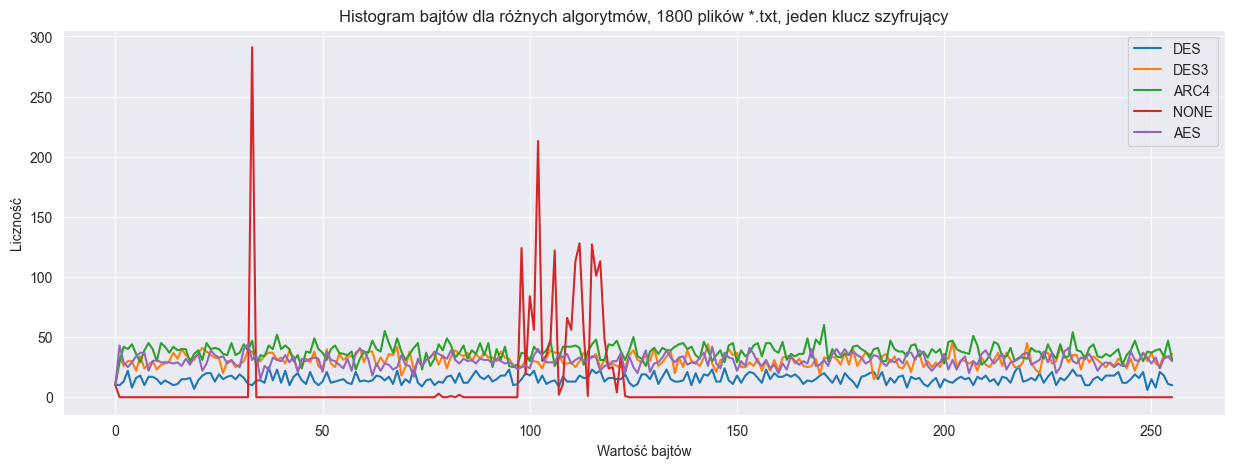

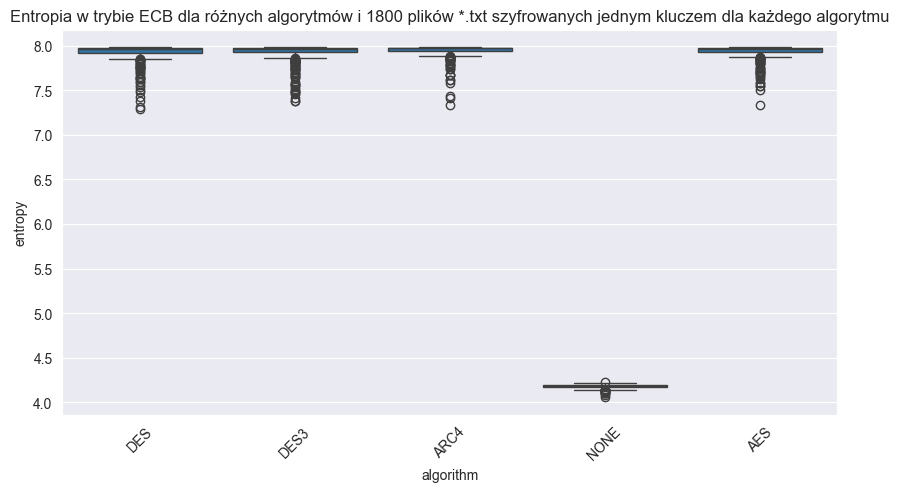

In [17]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_ecb_1800_1key["algorithm"].unique()):
    subset = df_txt_ecb_1800_1key[df_txt_ecb_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.txt, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_ecb_1800_1key["algorithm"], y=df_txt_ecb_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.txt szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [10]:
df_wav_ecb_1800_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_1key_csv/features_wav_ecb.csv'))
df_wav_ecb_1800_1key

file_name   format   entropy        mean     variance    std_dev  \
0     file0580.wav.enc  wav_ecb  7.997575  128.391782  5450.651057  73.828525   
1     file0590.wav.enc  wav_ecb  7.997934  127.788640  5477.503885  74.010161   
2     file0441.wav.enc  wav_ecb  7.997974  127.537895  5461.649689  73.902975   
3     file0539.wav.enc  wav_ecb  7.998181  127.219053  5452.992364  73.844379   
4     file0451.wav.enc  wav_ecb  7.997646  127.627465  5445.048542  73.790572   
...                ...      ...       ...         ...          ...        ...   
1795  file0211.wav.enc  wav_ecb  7.997943  127.389662  5429.482749  73.685024   
1796  file0263.wav.enc  wav_ecb  7.998949  127.303234  5451.235642  73.832484   
1797  file0273.wav.enc  wav_ecb  7.997846  127.656771  5453.973882  73.851025   
1798  file0105.wav.enc  wav_ecb  7.999086  127.526240  5471.086929  73.966796   
1799  file0115.wav.enc  wav_ecb  7.997714  127.265217  5450.663242  73.828607   

      skewness  kurtosis    energy        rms  ...  histogram_247  \
0    -0.012516 -1.193183   9309832  10.271136  ...            333   
1    -0.007195 -1.201255  18653272  10.281800  ...            736   
2    -0.003493 -1.200925  37124957  10.257444  ...           1388   
3     0.004669 -1.202843  27996094  10.285240  ...           1113   
4     0.000776 -1.196665  18622045  10.273190  ...            730   
...        ...       ...       ...        ...  ...            ...   
1795 -0.003498 -1.189355   9298586  10.264465  ...            346   
1796  0.003596 -1.198669  18628809  10.275055  ...            688   
1797  0.001350 -1.199323   9271068  10.249266  ...            389   
1798 -0.001821 -1.203244  18591070  10.264642  ...            707   
1799  0.003772 -1.194344   9306185  10.268659  ...            351   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0               324            348            385            391   
1               676            694            700            736   
2              1384           1384           1272           1352   
3              1032            969           1077            991   
4               640            641            726            752   
...             ...            ...            ...            ...   
1795            366            361            330            363   
1796            700            657            640            708   
1797            356            345            316            357   
1798            634            694            706            688   
1799            345            341            340            326   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               336            317            368            386        DES  
1               642            672            700            713        DES  
2              1378           1348           1424           1549        DES  
3               999           1036           1014            997        DES  
4               662            660            716            695        DES  
...             ...            ...            ...            ...        ...  
1795            339            341            330            323        AES  
1796            693            676            640            730        AES  
1797            358            333            335            367        AES  
1798            691            686            687            713        AES  
1799            340            355            337            366        AES  

[1800 rows x 267 columns]

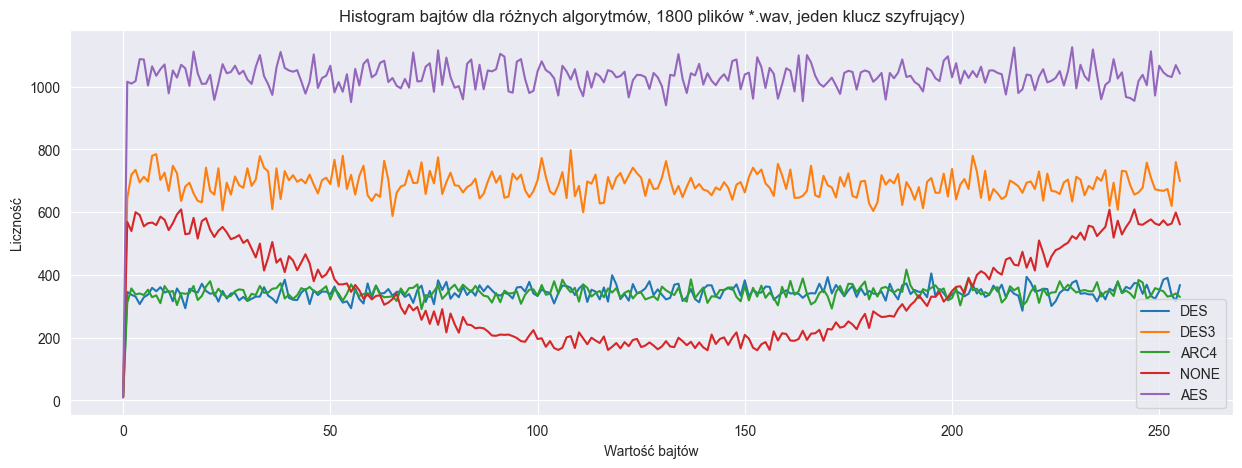

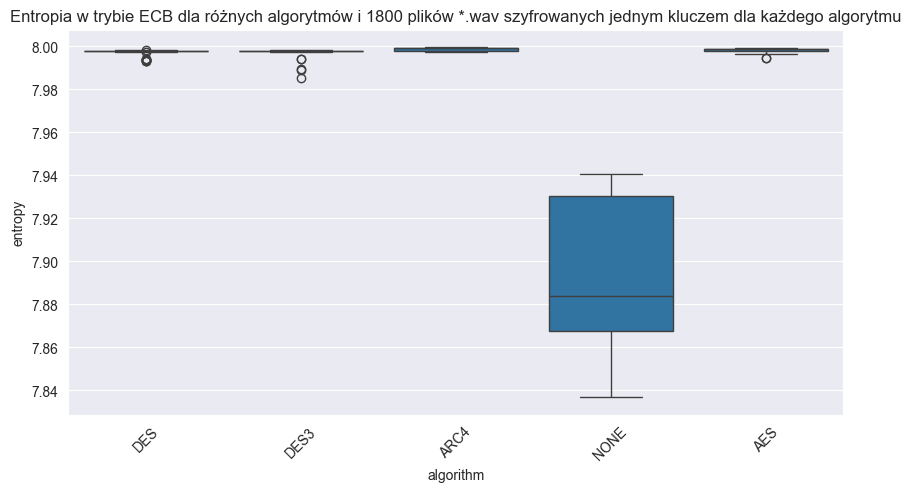

In [19]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_ecb_1800_1key["algorithm"].unique()):
    subset = df_wav_ecb_1800_1key[df_wav_ecb_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.wav, jeden klucz szyfrujący)")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_ecb_1800_1key["algorithm"], y=df_wav_ecb_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.wav szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (3 keys per algorithm)

In [7]:
df_all_ecb_1800_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_all.csv'))
df_all_ecb_1800_3keys

file_name    format   entropy        mean     variance  \
0       file0712.txt.enc   txt_ecb  7.949006  129.442951  5328.238125   
1       file0702.txt.enc   txt_ecb  7.958095  126.245961  5468.592777   
2       file0474.txt.enc   txt_ecb  7.951170  128.292127  5327.139109   
3       file0464.txt.enc   txt_ecb  7.931572  125.267361  5323.743101   
4       file0416.txt.enc   txt_ecb  7.976906  128.645947  5416.431366   
...                  ...       ...       ...         ...          ...   
10795  file0296.html.enc  html_ecb  7.975020  127.368357  5443.285002   
10796  file0205.html.enc  html_ecb  7.933916  128.554187  5477.788936   
10797  file0063.html.enc  html_ecb  7.965546  127.687707  5483.780991   
10798  file0062.html.enc  html_ecb  7.973147  126.390550  5475.274504   
10799  file0204.html.enc  html_ecb  7.981087  128.342105  5424.323329   

         std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0      72.994781 -0.034261 -1.162242   413759  10.242484  ...             15   
1      73.949934 -0.005645 -1.203137   491501  10.221827  ...             14   
2      72.987253 -0.032209 -1.163913   464727  10.343179  ...             18   
3      72.963985  0.047010 -1.160175   295710  10.132970  ...              5   
4      73.596409 -0.023341 -1.177501   773151  10.254852  ...             26   
...          ...       ...       ...      ...        ...  ...            ...   
10795  73.778622  0.021762 -1.206143   775205  10.251746  ...             20   
10796  74.012086 -0.019388 -1.192969   345176  10.308899  ...             11   
10797  74.052556 -0.008165 -1.200562   510261  10.276204  ...             18   
10798  73.995098  0.025759 -1.197544   699448  10.226560  ...             21   
10799  73.650006 -0.022345 -1.186383  1004598  10.324726  ...             43   

       histogram_248  histogram_249  histogram_250  histogram_251  \
0                 13             15             16             13   
1                 18             17             15             14   
2                 11             26             10              9   
3                  9             10             15             11   
4                 30             33             31             27   
...              ...            ...            ...            ...   
10795             42             27             32             32   
10796             14              9              8             13   
10797             30             20             19             23   
10798             26             24             29             33   
10799             47             40             32             36   

       histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 16             13             24             13        DES  
1                 17             16             12             19        DES  
2                 12             14             22             21        DES  
3                 10             12             12             12        DES  
4                 34             41             23             30        DES  
...              ...            ...            ...            ...        ...  
10795             24             30             28             24        AES  
10796              8             27             11             13        AES  
10797             15             23             17             19        AES  
10798             17             23             33             18        AES  
10799             28             31             32             35        AES  

[10800 rows x 267 columns]

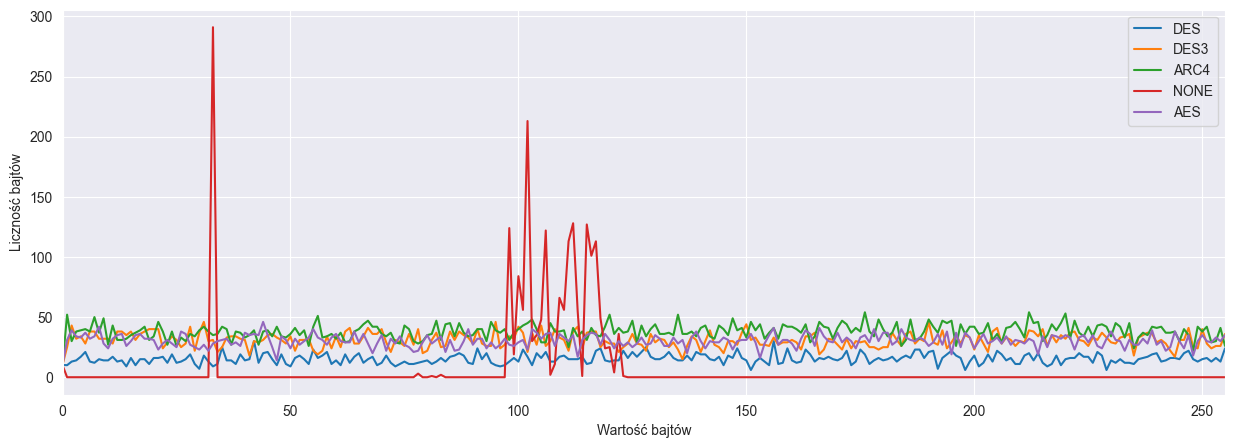

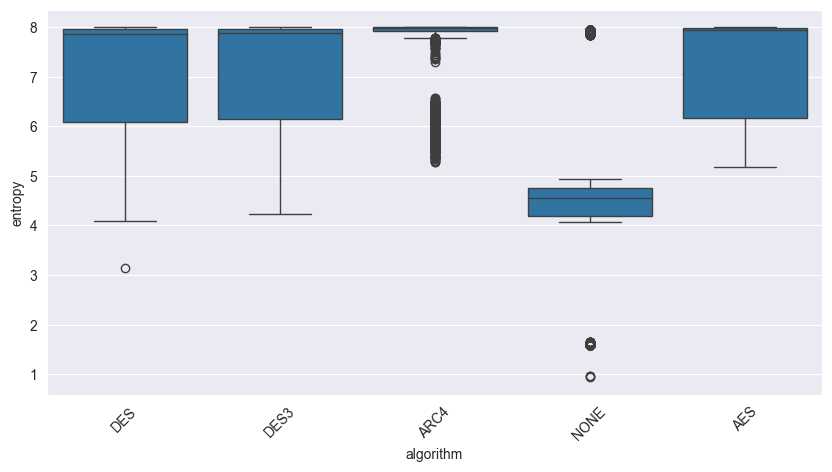

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_ecb_1800_3keys["algorithm"].unique()):
    subset = df_all_ecb_1800_3keys[df_all_ecb_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność bajtów")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_ecb_1800_3keys["algorithm"], y=df_all_ecb_1800_3keys["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie ECB dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, trzy klucze szyfrujące na algorytm")
plt.show()

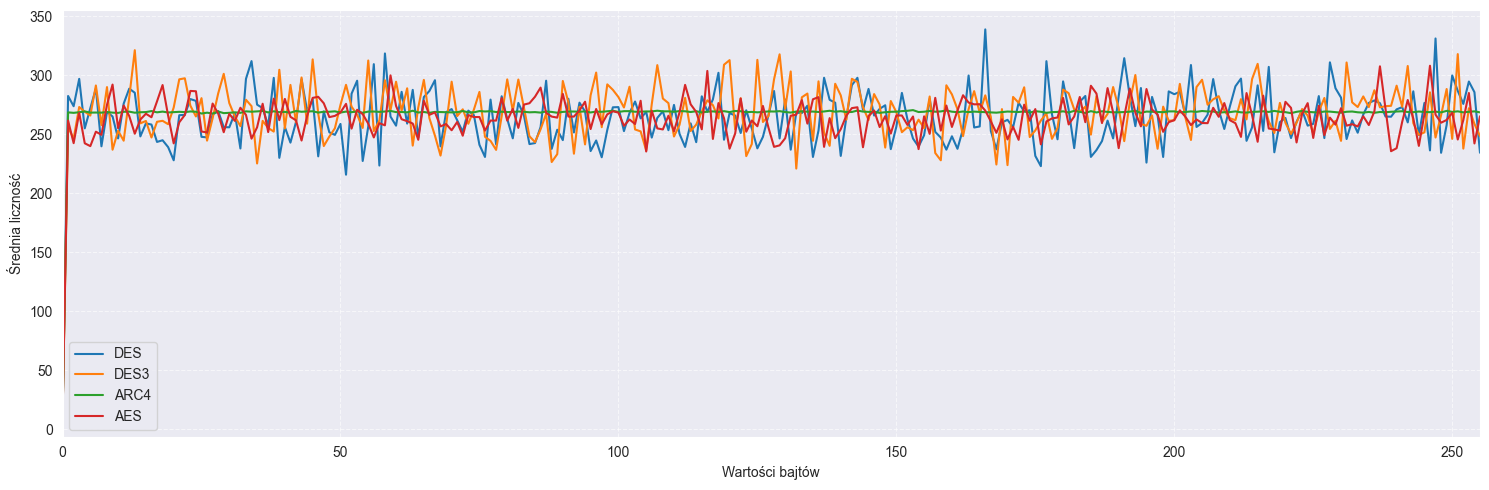

In [9]:
import matplotlib.pyplot as plt

algorithms = df_all_ecb_1800_3keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_ecb_1800_3keys[df_all_ecb_1800_3keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
df_bmp_ecb_1800_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_bmp_ecb.csv'))
df_bmp_ecb_1800_3keys

file_name   format   entropy        mean     variance  \
0     image_0416.bmp.enc  bmp_ecb  4.647180  146.647609  4158.956164   
1     image_0406.bmp.enc  bmp_ecb  4.646874  127.552870  6438.735420   
2     image_0608.bmp.enc  bmp_ecb  4.638786  119.444593  5612.596021   
3     image_0618.bmp.enc  bmp_ecb  4.588587  122.504914  4854.166105   
4     image_0382.bmp.enc  bmp_ecb  4.589046  130.123950  4609.099289   
...                  ...      ...       ...         ...          ...   
1795  image_0083.bmp.enc  bmp_ecb  5.514928  126.154679  7394.589911   
1796  image_0234.bmp.enc  bmp_ecb  5.597354  126.839088  6501.058165   
1797  image_0224.bmp.enc  bmp_ecb  5.626972  132.235495  4773.829198   
1798  image_0152.bmp.enc  bmp_ecb  5.555338  119.350840  7223.507333   
1799  image_0142.bmp.enc  bmp_ecb  5.655839  123.192132  5304.316685   

        std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0     64.489969 -0.111304 -0.921031  28053495  10.249102  ...          11026   
1     80.241731 -0.066279 -1.333020  20992100  10.238268  ...              0   
2     74.917261  0.261179 -1.016054  29569228  10.343256  ...              0   
3     69.671846  0.295287 -0.868122  25807711  10.781779  ...              0   
4     67.890348  0.092206 -0.851100  27003586  11.537635  ...              0   
...         ...       ...       ...       ...        ...  ...            ...   
1795  85.991801  0.156475 -1.447294   5928284   9.953337  ...              0   
1796  80.629140  0.044427 -1.271047   5234571   9.463586  ...              1   
1797  69.092903  0.139205 -1.254460  12037414  10.913176  ...              0   
1798  84.991219  0.085874 -1.445047  13175530   9.961189  ...           2730   
1799  72.830740  0.051680 -1.243684  16193911  10.136213  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 1              0            298              0   
1              8256              0           8257              0   
2                 0              0              0          11211   
3                 1              0              0              1   
4                 0              0              2              0   
...             ...            ...            ...            ...   
1795           1198              0              0              0   
1796           1182              0           1181             34   
1797           2104              1              0              1   
1798              1              0              0              0   
1799              0              1              1              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0              0              1              1        DES  
1                 0              0              0              0        DES  
2                 0              0              0              1        DES  
3              9247              1              1              0        DES  
4                 0           8449              0              0        DES  
...             ...            ...            ...            ...        ...  
1795              0           3594           2397              0        AES  
1796           1147             35              0           1181        AES  
1797              0              1              0              1        AES  
1798            105              0              0              0        AES  
1799           3206              1              0           3207        AES  

[1800 rows x 267 columns]

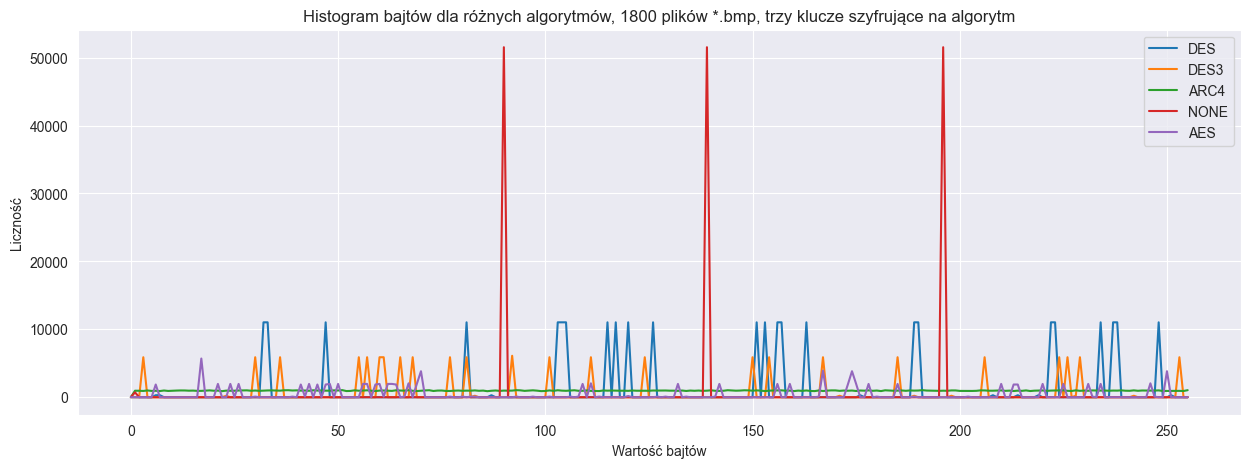

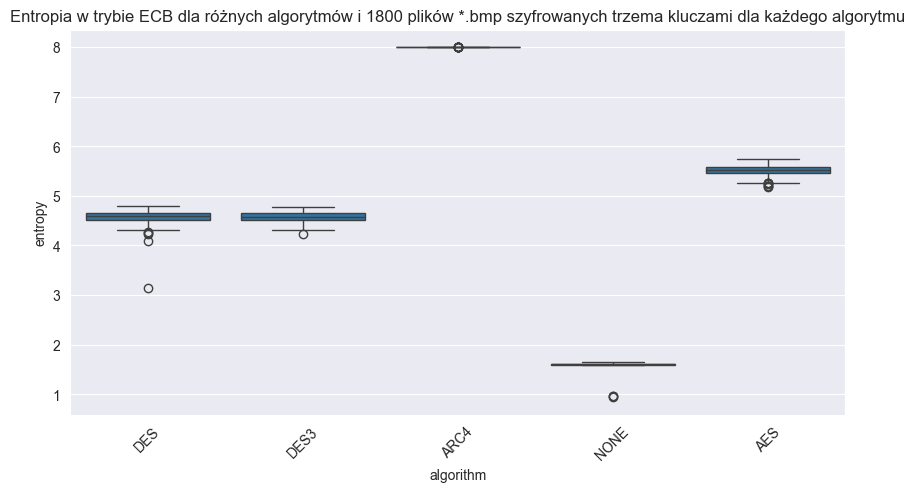

In [24]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_ecb_1800_3keys["algorithm"].unique()):
    subset = df_bmp_ecb_1800_3keys[df_bmp_ecb_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.bmp, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_ecb_1800_3keys["algorithm"], y=df_bmp_ecb_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.bmp szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [14]:
df_csv_ecb_1800_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_csv_ecb.csv'))
df_csv_ecb_1800_3keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0715.csv.enc  csv_ecb  6.322849  119.580357  6111.350686  78.175128   
1     file0705.csv.enc  csv_ecb  5.738205  127.750000  3869.593750  62.206059   
2     file0473.csv.enc  csv_ecb  6.256736  140.593750  5075.199544  71.240435   
3     file0463.csv.enc  csv_ecb  5.508161  126.071429  4404.852041  66.369059   
4     file0385.csv.enc  csv_ecb  6.260802  121.520833  5085.499566  71.312689   
...                ...      ...       ...         ...          ...        ...   
1795  file0127.csv.enc  csv_ecb  5.812500  127.718750  5213.202148  72.202508   
1796  file0251.csv.enc  csv_ecb  5.800705  128.609375  5169.738037  71.900890   
1797  file0329.csv.enc  csv_ecb  5.875000  136.671875  6156.314209  78.462183   
1798  file0241.csv.enc  csv_ecb  6.566330  117.320312  5667.889587  75.285388   
1799  file0339.csv.enc  csv_ecb  6.237492  134.987500  5375.887344  73.320443   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.070892 -1.281924   12731  10.661597  ...              0   
1    -0.181324 -0.830261    7274  10.660969  ...              0   
2    -0.193313 -1.149973   10669  10.542078  ...              0   
3    -0.080852 -0.909241    5472   9.885054  ...              0   
4     0.142572 -1.086604   10702  10.558370  ...              0   
...        ...       ...     ...        ...  ...            ...   
1795  0.128933 -1.026478    6994  10.453767  ...              1   
1796 -0.047398 -1.077118    6791  10.300940  ...              0   
1797 -0.030795 -1.454353    6625  10.174263  ...              0   
1798  0.231399 -1.200041   13817  10.389673  ...              0   
1799 -0.160736 -1.131367    7737   9.834251  ...              1   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0              1              0              0   
1                 0              0              1              0   
2                 0              0              0              1   
3                 1              1              1              0   
4                 0              1              0              0   
...             ...            ...            ...            ...   
1795              0              0              0              1   
1796              0              0              1              0   
1797              0              2              0              1   
1798              0              1              1              1   
1799              0              0              0              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 1              2              0              1        DES  
1                 0              0              0              0        DES  
2                 1              1              0              1        DES  
3                 0              0              0              0        DES  
4                 0              0              0              0        DES  
...             ...            ...            ...            ...        ...  
1795              0              1              0              0        AES  
1796              0              0              1              0        AES  
1797              1              1              0              0        AES  
1798              0              1              1              0        AES  
1799              0              0              1              0        AES  

[1800 rows x 267 columns]

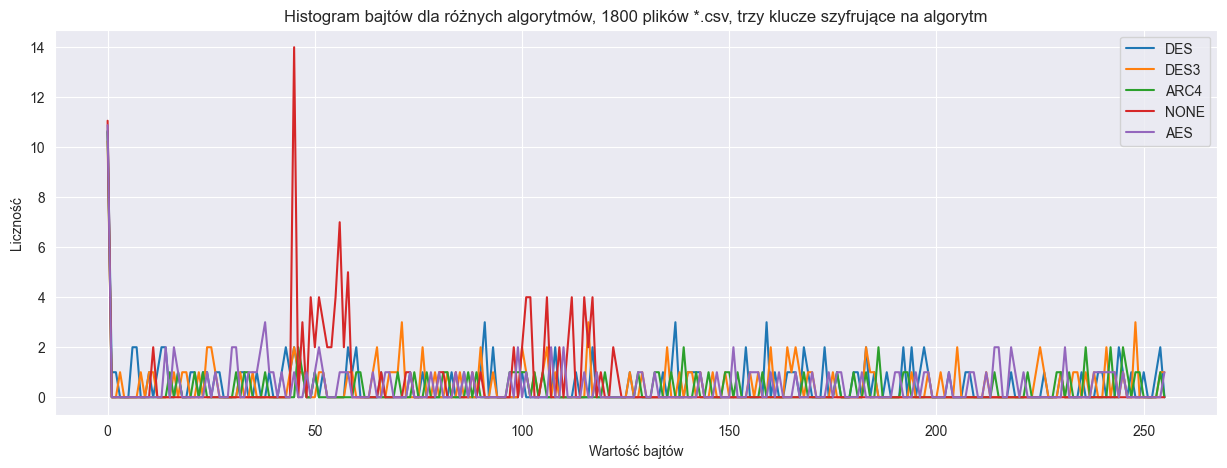

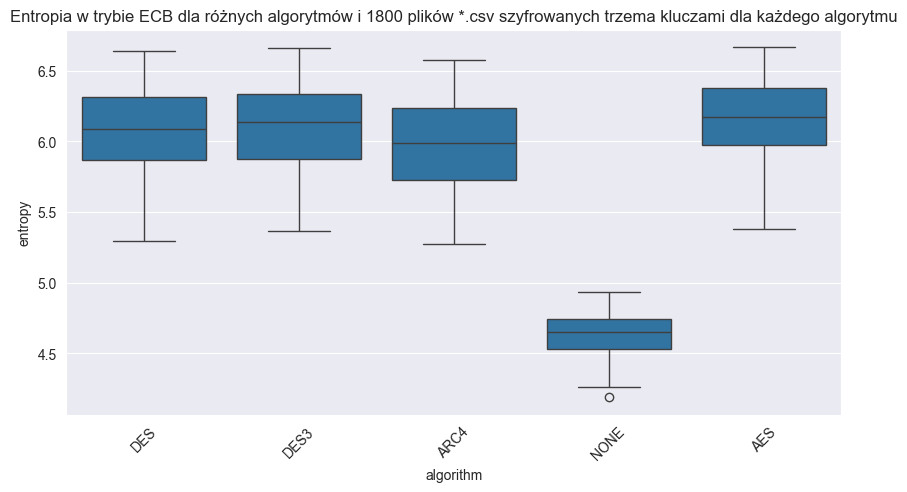

In [26]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_ecb_1800_3keys["algorithm"].unique()):
    subset = df_csv_ecb_1800_3keys[df_csv_ecb_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.csv, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_ecb_1800_3keys["algorithm"], y=df_csv_ecb_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.csv szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [15]:
df_html_ecb_1800_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_html_ecb.csv'))
df_html_ecb_1800_3keys

file_name    format   entropy        mean     variance  \
0     file0674.html.enc  html_ecb  7.931919  127.526392  5424.243503   
1     file0412.html.enc  html_ecb  7.904154  127.172335  5511.594841   
2     file0413.html.enc  html_ecb  7.969000  126.526840  5414.974082   
3     file0675.html.enc  html_ecb  7.960784  127.162451  5475.736580   
4     file0588.html.enc  html_ecb  7.959979  126.427241  5431.048154   
...                 ...       ...       ...         ...          ...   
1795  file0296.html.enc  html_ecb  7.975020  127.368357  5443.285002   
1796  file0205.html.enc  html_ecb  7.933916  128.554187  5477.788936   
1797  file0063.html.enc  html_ecb  7.965546  127.687707  5483.780991   
1798  file0062.html.enc  html_ecb  7.973147  126.390550  5475.274504   
1799  file0204.html.enc  html_ecb  7.981087  128.342105  5424.323329   

        std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0     73.649464  0.015020 -1.202213   370637  10.367899  ...             13   
1     74.240116  0.030252 -1.228770   231265  10.309213  ...              9   
2     73.586507  0.022578 -1.187233   972557  10.322139  ...             32   
3     73.998220  0.008793 -1.202545   655342  10.307701  ...             26   
4     73.695645  0.028751 -1.182721   617786  10.320602  ...             21   
...         ...       ...       ...      ...        ...  ...            ...   
1795  73.778622  0.021762 -1.206143   775205  10.251746  ...             20   
1796  74.012086 -0.019388 -1.192969   345176  10.308899  ...             11   
1797  74.052556 -0.008165 -1.200562   510261  10.276204  ...             18   
1798  73.995098  0.025759 -1.197544   699448  10.226560  ...             21   
1799  73.650006 -0.022345 -1.186383  1004598  10.324726  ...             43   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                17             12             16             10   
1                11              6              8              3   
2                35             42             34             44   
3                22             18             28             30   
4                21             25             25             26   
...             ...            ...            ...            ...   
1795             42             27             32             32   
1796             14              9              8             13   
1797             30             20             19             23   
1798             26             24             29             33   
1799             47             40             32             36   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                15             12             16              7        DES  
1                 9              7              9              8        DES  
2                37             32             34             28        DES  
3                25             34             19             33        DES  
4                21             31             16             18        DES  
...             ...            ...            ...            ...        ...  
1795             24             30             28             24        AES  
1796              8             27             11             13        AES  
1797             15             23             17             19        AES  
1798             17             23             33             18        AES  
1799             28             31             32             35        AES  

[1800 rows x 267 columns]

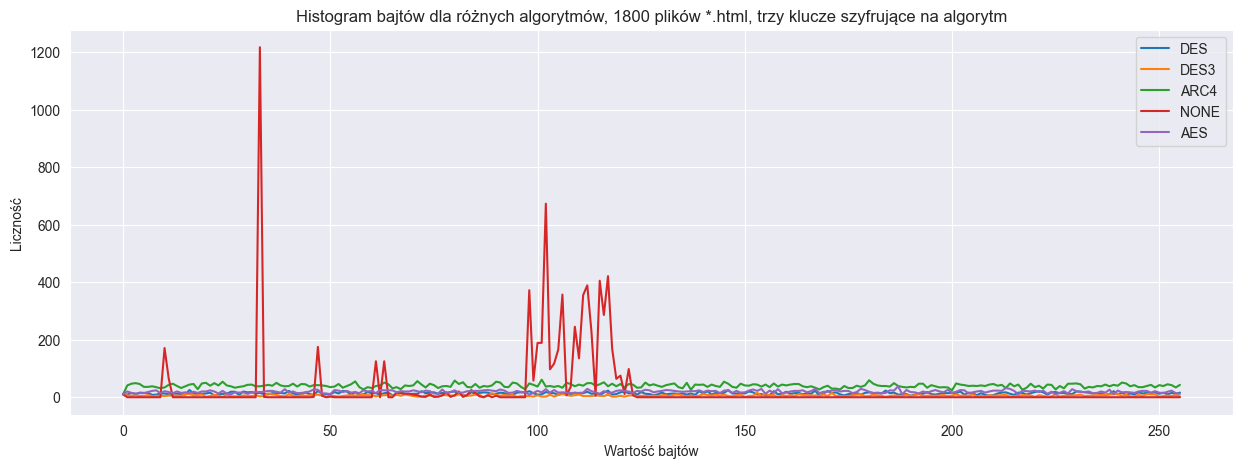

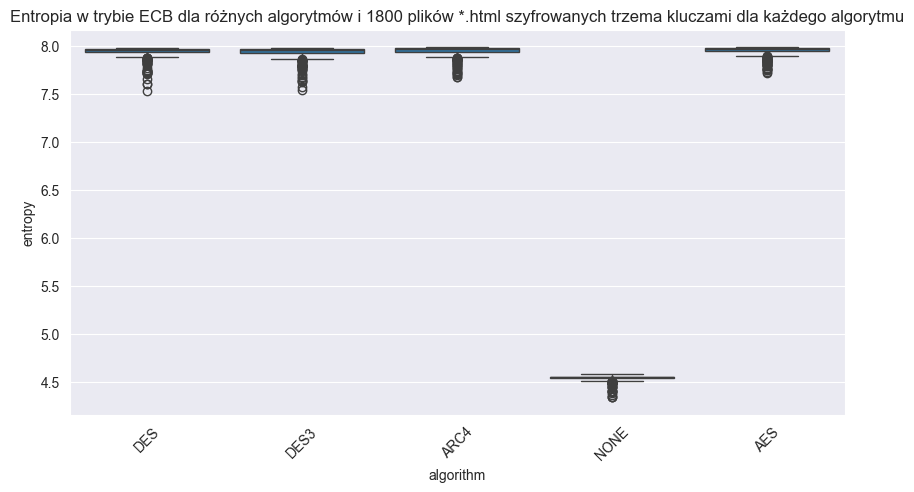

In [28]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_ecb_1800_3keys["algorithm"].unique()):
    subset = df_html_ecb_1800_3keys[df_html_ecb_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.html, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_ecb_1800_3keys["algorithm"], y=df_html_ecb_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.html szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [17]:
df_pyth_ecb_1800_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_pyth_ecb.csv'))
df_pyth_ecb_1800_3keys

file_name    format   entropy        mean     variance    std_dev  \
0     file0380.py.enc  pyth_ecb  7.859966  129.364876  5332.799233  73.026018   
1     file0666.py.enc  pyth_ecb  7.842193  127.271980  5412.487083  73.569607   
2     file0605.py.enc  pyth_ecb  7.865388  128.321287  5331.852132  73.019533   
3     file0705.py.enc  pyth_ecb  7.828608  129.246353  5334.852109  73.040072   
4     file0678.py.enc  pyth_ecb  7.844203  129.238297  5591.254719  74.774693   
...               ...       ...       ...         ...          ...        ...   
1795  file0075.py.enc  pyth_ecb  7.979392  128.619707  5456.034094  73.864972   
1796  file0108.py.enc  pyth_ecb  7.955530  126.636029  5465.776911  73.930893   
1797  file0008.py.enc  pyth_ecb  7.771541  127.555921  5689.382838  75.427998   
1798  file0116.py.enc  pyth_ecb  7.972444  128.019161  5468.592699  73.949934   
1799  file0016.py.enc  pyth_ecb  7.806095  126.353125  5548.151344  74.485914   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.022051 -1.180260  746645  10.246162  ...             26   
1     0.024691 -1.180638  480325  10.326863  ...             13   
2    -0.019519 -1.185538  742917  10.261028  ...             24   
3     0.003450 -1.165359  320647  10.310932  ...              9   
4    -0.011195 -1.227719  423901  10.273901  ...             20   
...        ...       ...     ...        ...  ...            ...   
1795 -0.017220 -1.197529  944769  10.314694  ...             29   
1796  0.015341 -1.197250  488243  10.275645  ...             26   
1797 -0.030017 -1.255678   94241  10.165354  ...              4   
1798 -0.018868 -1.209155  695420  10.283541  ...             27   
1799  0.055903 -1.183712  100029  10.207687  ...              4   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                26             57             13             31   
1                17             10             15             14   
2                20             52             19             26   
3                14              8             18              9   
4                14             17             21             10   
...             ...            ...            ...            ...   
1795             32             35             40             36   
1796             11             16             23             15   
1797              2              2              1              5   
1798             30             27             19             27   
1799              6              5              2              5   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                20             33             36             15        DES  
1                15             16             15             32        DES  
2                21             26             23             23        DES  
3                12             11              5             20        DES  
4                 8              9             12             31        DES  
...             ...            ...            ...            ...        ...  
1795             28             32             33             34        AES  
1796             13             25             22             16        AES  
1797              5              3              4              5        AES  
1798             11             20             22             32        AES  
1799              8              8              2              8        AES  

[1800 rows x 267 columns]

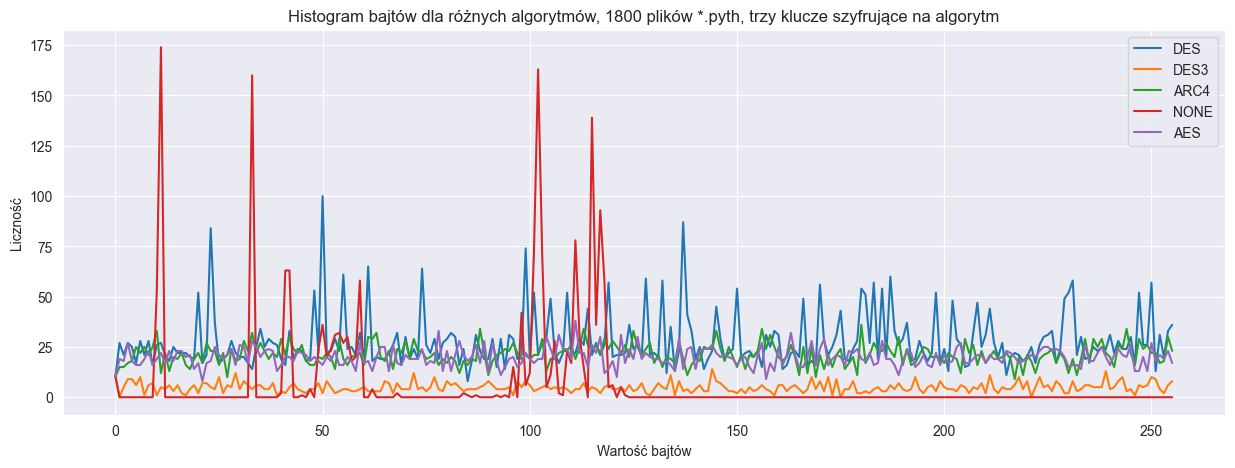

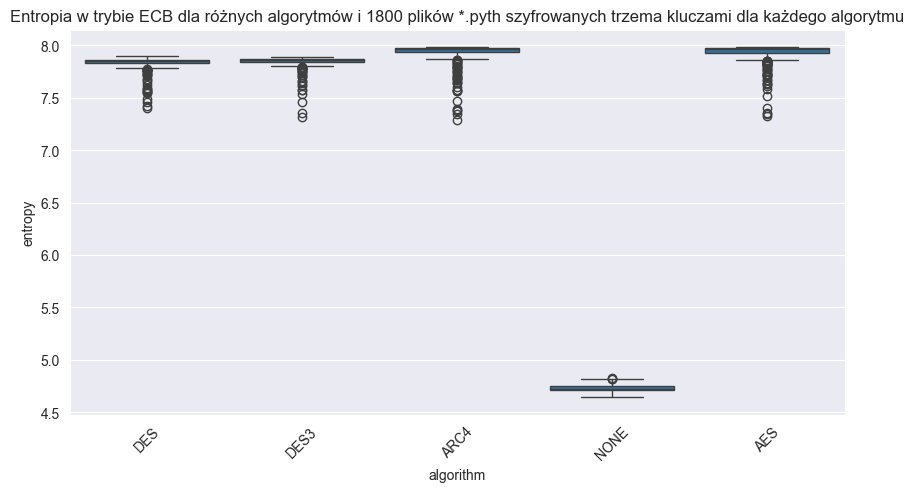

In [30]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_ecb_1800_3keys["algorithm"].unique()):
    subset = df_pyth_ecb_1800_3keys[df_pyth_ecb_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.pyth, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_ecb_1800_3keys["algorithm"], y=df_pyth_ecb_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.pyth szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [18]:
df_txt_ecb_1800_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_txt_ecb.csv'))
df_txt_ecb_1800_3keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0712.txt.enc  txt_ecb  7.949006  129.442951  5328.238125  72.994781   
1     file0702.txt.enc  txt_ecb  7.958095  126.245961  5468.592777  73.949934   
2     file0474.txt.enc  txt_ecb  7.951170  128.292127  5327.139109  72.987253   
3     file0464.txt.enc  txt_ecb  7.931572  125.267361  5323.743101  72.963985   
4     file0416.txt.enc  txt_ecb  7.976906  128.645947  5416.431366  73.596409   
...                ...      ...       ...         ...          ...        ...   
1795  file0058.txt.enc  txt_ecb  7.900137  127.298077  5446.343842  73.799349   
1796  file0256.txt.enc  txt_ecb  7.980171  128.467386  5420.147345  73.621650   
1797  file0246.txt.enc  txt_ecb  7.979063  127.668142  5519.904693  74.296061   
1798  file0189.txt.enc  txt_ecb  7.960281  125.068142  5473.961068  73.986222   
1799  file0199.txt.enc  txt_ecb  7.857109  129.299107  5448.005773  73.810607   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.034261 -1.162242  413759  10.242484  ...             15   
1    -0.005645 -1.203137  491501  10.221827  ...             14   
2    -0.032209 -1.163913  464727  10.343179  ...             18   
3     0.047010 -1.160175  295710  10.132970  ...              5   
4    -0.023341 -1.177501  773151  10.254852  ...             26   
...        ...       ...     ...        ...  ...            ...   
1795 -0.002130 -1.202389  197118  10.261485  ...              7   
1796 -0.020253 -1.184187  919571  10.222363  ...             38   
1797 -0.007684 -1.219959  946054  10.229956  ...             48   
1798  0.036174 -1.195787  488710  10.298391  ...             22   
1799 -0.018128 -1.230409  145636  10.409617  ...              5   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                13             15             16             13   
1                18             17             15             14   
2                11             26             10              9   
3                 9             10             15             11   
4                30             33             31             27   
...             ...            ...            ...            ...   
1795              9              5              7              7   
1796             36             31             40             27   
1797             35             24             39             36   
1798              7             19             14             14   
1799              4              4              6              6   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                16             13             24             13        DES  
1                17             16             12             19        DES  
2                12             14             22             21        DES  
3                10             12             12             12        DES  
4                34             41             23             30        DES  
...             ...            ...            ...            ...        ...  
1795             11              9             10              4        AES  
1796             29             41             38             40        AES  
1797             31             37             36             38        AES  
1798             22             17             16             20        AES  
1799              7              0              8              8        AES  

[1800 rows x 267 columns]

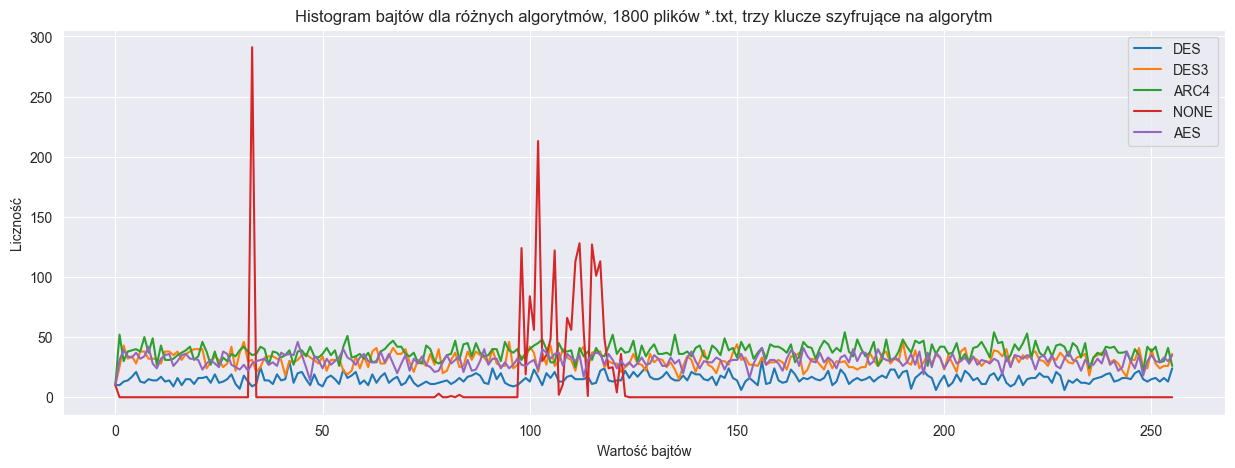

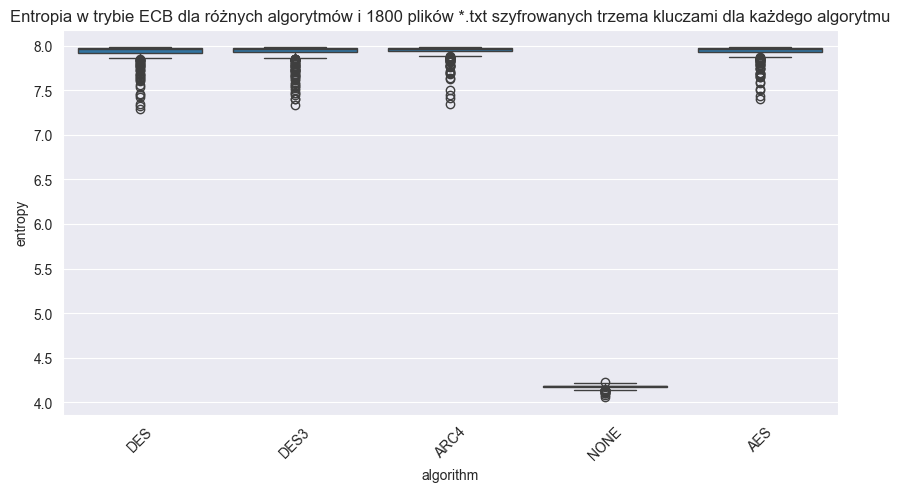

In [32]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_ecb_1800_3keys["algorithm"].unique()):
    subset = df_txt_ecb_1800_3keys[df_txt_ecb_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.txt, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_ecb_1800_3keys["algorithm"], y=df_txt_ecb_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.txt szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [19]:
df_wav_ecb_1800_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1800/features_ecb_1800_3keys_csv/features_wav_ecb.csv'))
df_wav_ecb_1800_3keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0580.wav.enc  wav_ecb  7.998008  127.596863  5451.298047  73.832906   
1     file0590.wav.enc  wav_ecb  7.997626  127.050179  5427.036122  73.668420   
2     file0441.wav.enc  wav_ecb  7.997539  127.639678  5467.231720  73.940731   
3     file0539.wav.enc  wav_ecb  7.997738  127.433372  5471.008204  73.966264   
4     file0451.wav.enc  wav_ecb  7.998327  127.626547  5485.574607  74.064665   
...                ...      ...       ...         ...          ...        ...   
1795  file0211.wav.enc  wav_ecb  7.998105  127.578510  5464.997757  73.925623   
1796  file0263.wav.enc  wav_ecb  7.999011  127.479178  5458.121801  73.879103   
1797  file0273.wav.enc  wav_ecb  7.997811  127.159672  5494.583461  74.125458   
1798  file0105.wav.enc  wav_ecb  7.999013  127.175995  5471.672270  73.970753   
1799  file0115.wav.enc  wav_ecb  7.997916  127.198275  5466.842723  73.938101   

      skewness  kurtosis    energy        rms  ...  histogram_247  \
0    -0.003945 -1.197528   9331884  10.283293  ...            371   
1     0.005995 -1.191611  18592886  10.265144  ...            758   
2    -0.004128 -1.197645  37085381  10.251975  ...           1452   
3     0.000073 -1.204615  28045469  10.294305  ...            975   
4    -0.005467 -1.204332  18636909  10.277289  ...            680   
...        ...       ...       ...        ...  ...            ...   
1795 -0.001258 -1.203030   9324601  10.278814  ...            332   
1796 -0.002897 -1.199800  18657898  10.283075  ...            674   
1797  0.007889 -1.208472   9303576  10.267219  ...            339   
1798  0.006224 -1.202127  18600730  10.267309  ...            707   
1799  0.007314 -1.201693   9284511  10.256694  ...            352   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0               337            336            331            335   
1               632            593            666            671   
2              1516           1396           1304           1473   
3              1002           1146            933           1029   
4               689            696            705            742   
...             ...            ...            ...            ...   
1795            336            318            343            340   
1796            684            703            682            719   
1797            357            361            377            350   
1798            644            703            669            753   
1799            334            312            356            340   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               350            330            360            338        DES  
1               680            658            668            634        DES  
2              1416           1392           1412           1420        DES  
3              1030           1072            975           1068        DES  
4               704            738            750            624        DES  
...             ...            ...            ...            ...        ...  
1795            343            369            351            357        AES  
1796            708            678            652            688        AES  
1797            348            325            352            330        AES  
1798            721            700            658            653        AES  
1799            372            350            354            311        AES  

[1800 rows x 267 columns]

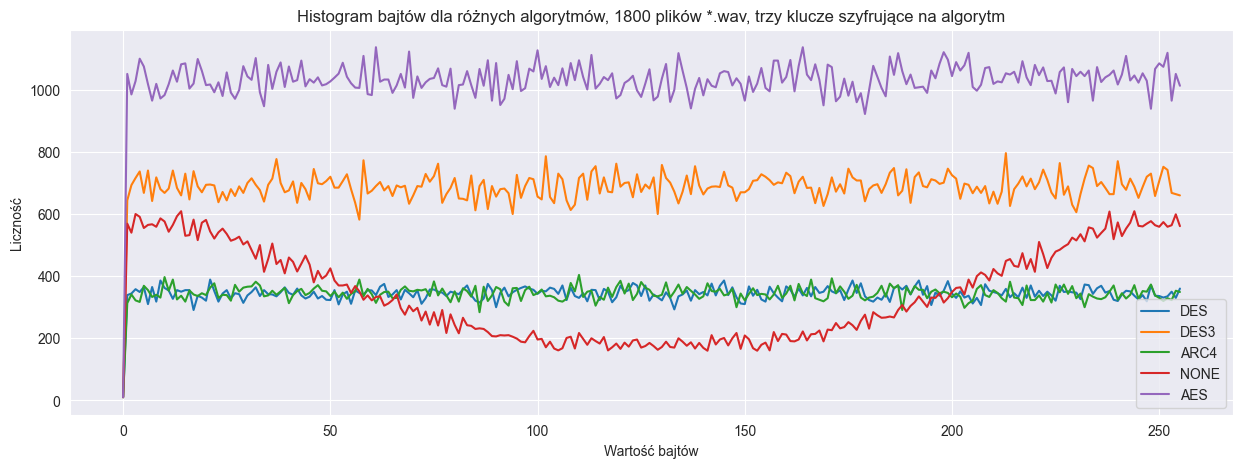

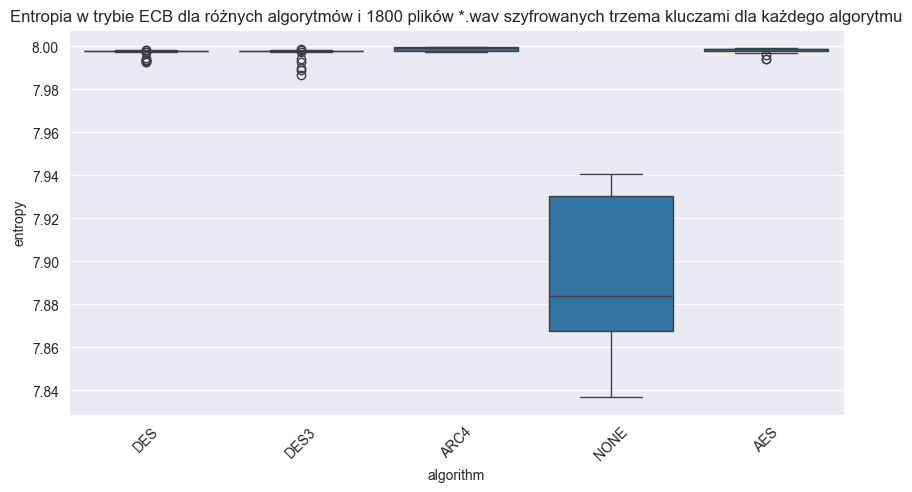

In [34]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_ecb_1800_3keys["algorithm"].unique()):
    subset = df_wav_ecb_1800_3keys[df_wav_ecb_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.wav, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_ecb_1800_3keys["algorithm"], y=df_wav_ecb_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.wav szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (6 keys per algorithm)

In [11]:
df_all_ecb_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_all.csv'))
df_all_ecb_1800_6keys

file_name    format   entropy        mean     variance  \
0       file0712.txt.enc   txt_ecb  7.954571  127.711714  5570.495238   
1       file0702.txt.enc   txt_ecb  7.956312  129.129677  5457.885820   
2       file0474.txt.enc   txt_ecb  7.952469  126.718462  5451.282385   
3       file0464.txt.enc   txt_ecb  7.934643  126.921528  5488.975787   
4       file0416.txt.enc   txt_ecb  7.972640  127.630441  5492.408176   
...                  ...       ...       ...         ...          ...   
10795  file0296.html.enc  html_ecb  7.974892  127.717055  5532.366933   
10796  file0205.html.enc  html_ecb  7.941012  129.273399  5409.375376   
10797  file0063.html.enc  html_ecb  7.951605  127.036424  5450.371604   
10798  file0062.html.enc  html_ecb  7.974435  125.989982  5403.388506   
10799  file0204.html.enc  html_ecb  7.980061  126.500318  5448.742572   

         std_dev  skewness  kurtosis  energy        rms  ...  histogram_247  \
0      74.635750 -0.000505 -1.214700  411065  10.209084  ...             18   
1      73.877506 -0.028154 -1.210878  488986  10.195641  ...             17   
2      73.832800  0.018871 -1.186578  455505  10.240040  ...             21   
3      74.087622  0.007566 -1.198594  305680  10.302373  ...             11   
4      74.110783 -0.010423 -1.213082  773125  10.254680  ...             23   
...          ...       ...       ...     ...        ...  ...            ...   
10795  74.379883 -0.003293 -1.210410  766113  10.191450  ...             23   
10796  73.548456 -0.003337 -1.187548  340998  10.246320  ...             11   
10797  73.826632  0.003938 -1.201273  509002  10.263519  ...             21   
10798  73.507745  0.032749 -1.182400  705043  10.267381  ...             13   
10799  73.815598  0.011435 -1.198972  991905  10.259292  ...             34   

       histogram_248  histogram_249  histogram_250  histogram_251  \
0                 14             16             17             14   
1                 27             19             21             11   
2                 19             21             21             15   
3                 12             11             10              8   
4                 36             29             25             27   
...              ...            ...            ...            ...   
10795             36             35             23             32   
10796              9              9             12             14   
10797             13             10             27             11   
10798             23             34             17             28   
10799             34             40             33             28   

       histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 15             12             22             22        DES  
1                 21             23             17             22        DES  
2                 13             17             15             21        DES  
3                 13              9             10             14        DES  
4                 24             29             16             24        DES  
...              ...            ...            ...            ...        ...  
10795             36             31             27             32        AES  
10796             10             14             12             20        AES  
10797             19             24             13             24        AES  
10798             25             25             36             23        AES  
10799             47             27             38             41        AES  

[10800 rows x 267 columns]

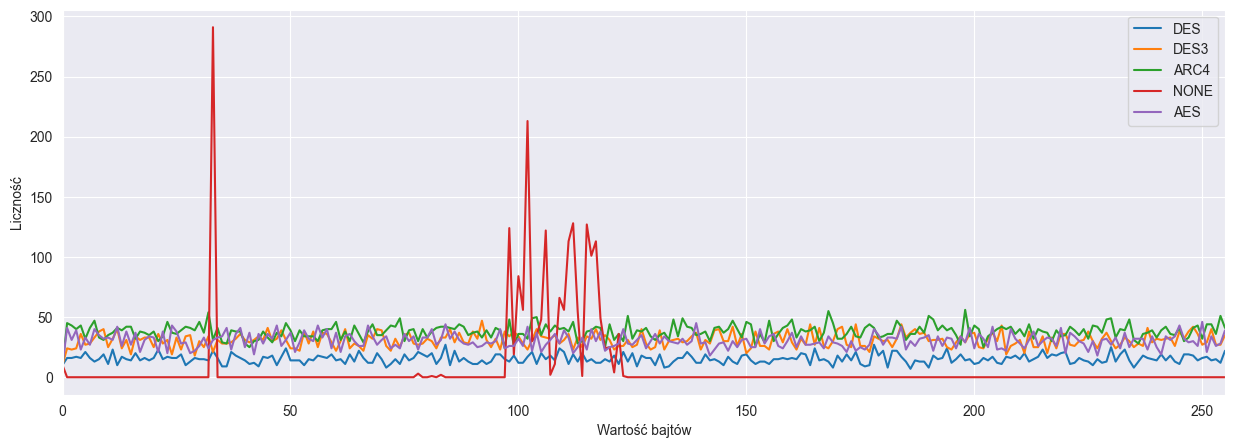

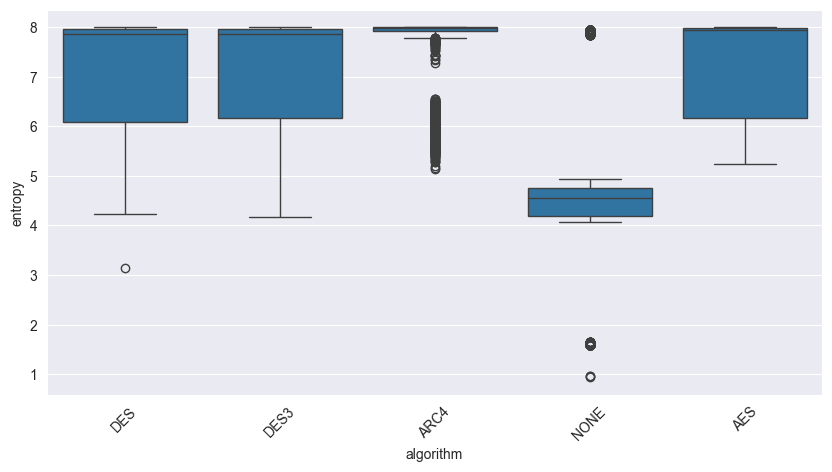

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_ecb_1800_6keys["algorithm"].unique()):
    subset = df_all_ecb_1800_6keys[df_all_ecb_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title(
    #"Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_ecb_1800_6keys["algorithm"], y=df_all_ecb_1800_6keys["entropy"])
plt.xticks(rotation=45)
#plt.title(
    #"Entropia w trybie ECB dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, sześć kluczy szyfrujących na algorytm")
plt.show()

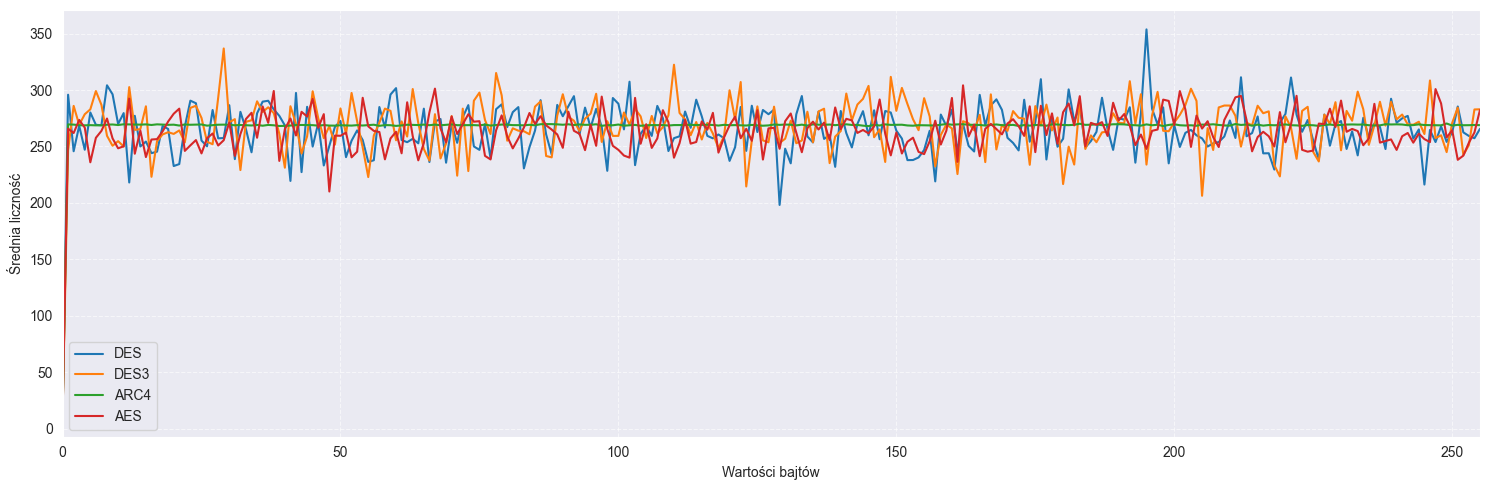

In [14]:
import matplotlib.pyplot as plt

algorithms = df_all_ecb_1800_6keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_ecb_1800_6keys[df_all_ecb_1800_6keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
df_bmp_ecb_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_bmp_ecb.csv'))
df_bmp_ecb_1800_6keys

file_name   format   entropy        mean     variance  \
0     image_0416.bmp.enc  bmp_ecb  4.548904  123.062434  6480.682679   
1     image_0406.bmp.enc  bmp_ecb  4.482444  144.738545  4200.609547   
2     image_0608.bmp.enc  bmp_ecb  4.559791  124.197755  3680.342127   
3     image_0618.bmp.enc  bmp_ecb  4.422082  142.913445  3963.173646   
4     image_0382.bmp.enc  bmp_ecb  4.505808  118.463506  7883.641686   
...                  ...      ...       ...         ...          ...   
1795  image_0083.bmp.enc  bmp_ecb  5.644698  118.706651  4874.475176   
1796  image_0234.bmp.enc  bmp_ecb  5.635154  128.600226  5349.201322   
1797  image_0224.bmp.enc  bmp_ecb  5.563764  118.562015  4310.026529   
1798  image_0152.bmp.enc  bmp_ecb  5.545851  143.540848  5348.847620   
1799  image_0142.bmp.enc  bmp_ecb  5.567051  124.641800  5142.637427   

        std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0     80.502687  0.315458 -1.219094  25162724   9.706690  ...          11026   
1     64.812110 -0.453872 -0.658702  27568072  11.732802  ...              0   
2     60.665823 -0.334018 -0.908127  33068554  10.938175  ...              2   
3     62.953742 -0.247037 -0.866571  27010134  11.030090  ...              1   
4     88.789874  0.172704 -1.504219  18858267   9.641774  ...              0   
...         ...       ...       ...       ...        ...  ...            ...   
1795  69.817442  0.193033 -0.985294   5780148   9.828193  ...              1   
1796  73.138234  0.007775 -1.231017   6302920  10.384511  ...           1183   
1797  65.650792  0.216919 -1.030276   9699710   9.796342  ...              0   
1798  73.135816 -0.162407 -1.122775  13800640  10.194754  ...              2   
1799  71.712185  0.289723 -0.802957  16396032  10.199273  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0          22350              0              0   
1              8256              1              0              0   
2                 0              1              0              0   
3                 0              0              2              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1795              0              0              1              0   
1796              1              0              0           1147   
1797           2105             92           2104             92   
1798           2730              1              1              0   
1799            229              1              1           3206   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0          11026              0              0        DES  
1                 1              0              0              0        DES  
2                 0              0              0              1        DES  
3                 0              1              0              0        DES  
4              8451           8449              0              0        DES  
...             ...            ...            ...            ...        ...  
1795              0              0              0           1200        AES  
1796             70              0             35              1        AES  
1797             91              0              0              0        AES  
1798            105           2730              1           2731        AES  
1799           6412              1           3206            229        AES  

[1800 rows x 267 columns]

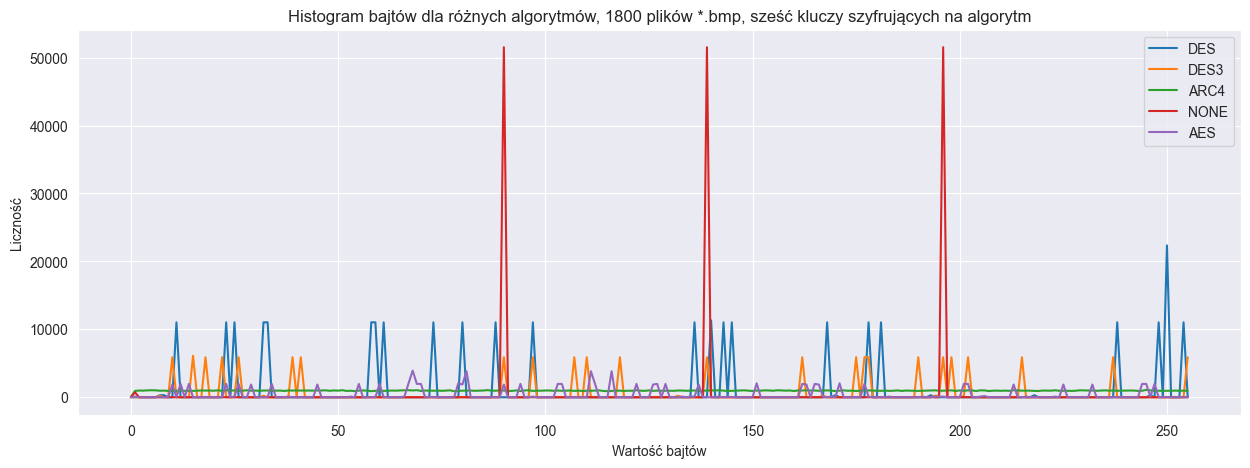

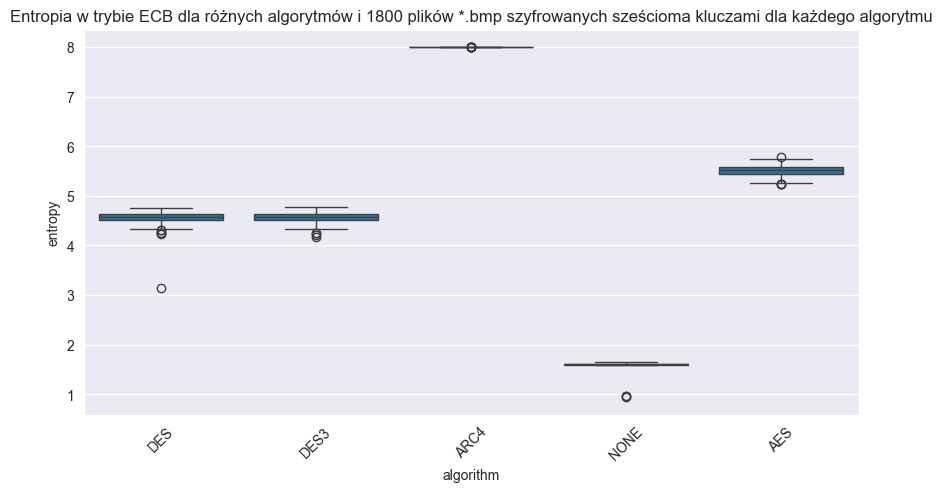

In [38]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_ecb_1800_6keys["algorithm"].unique()):
    subset = df_bmp_ecb_1800_6keys[df_bmp_ecb_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.bmp, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_ecb_1800_6keys["algorithm"], y=df_bmp_ecb_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.bmp szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [22]:
df_csv_ecb_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_csv_ecb.csv'))
df_csv_ecb_1800_6keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0715.csv.enc  csv_ecb  6.383161  124.767857  5766.963967  75.940529   
1     file0705.csv.enc  csv_ecb  5.601410  123.937500  4987.527344  70.622428   
2     file0473.csv.enc  csv_ecb  6.269706  122.187500  5292.819010  72.751763   
3     file0463.csv.enc  csv_ecb  5.436732  138.000000  5274.642857  72.626737   
4     file0385.csv.enc  csv_ecb  6.264599  110.927083  4723.317600  68.726397   
...                ...      ...       ...         ...          ...        ...   
1795  file0127.csv.enc  csv_ecb  5.675705  118.484375  5069.312256  71.199103   
1796  file0251.csv.enc  csv_ecb  5.831955  122.015625  5081.421631  71.284091   
1797  file0329.csv.enc  csv_ecb  5.750000  140.093750  5143.959961  71.721405   
1798  file0241.csv.enc  csv_ecb  6.591682  130.515625  5680.218506  75.367224   
1799  file0339.csv.enc  csv_ecb  5.928056  132.000000  4811.250000  69.363175   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.061311 -1.196400   11678  10.211163  ...              0   
1    -0.048622 -1.094612    6914  10.393808  ...              0   
2    -0.048269 -1.137059   10362  10.389297  ...              0   
3     0.068174 -1.283561    5300   9.728456  ...              0   
4     0.152136 -1.063432   10381  10.398818  ...              1   
...        ...       ...     ...        ...  ...            ...   
1795  0.255319 -1.248837    7671  10.948031  ...              1   
1796  0.088204 -1.344581    6479  10.061529  ...              0   
1797 -0.157483 -0.922928    6542  10.110329  ...              0   
1798 -0.030204 -1.215916   12870  10.027306  ...              0   
1799 -0.019587 -1.083665    8580  10.356158  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              1              1              0   
3                 1              0              0              0   
4                 0              0              1              0   
...             ...            ...            ...            ...   
1795              0              1              0              0   
1796              0              2              0              0   
1797              0              0              0              0   
1798              0              0              0              2   
1799              0              0              0              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 2              3              0              1        DES  
1                 1              0              0              0        DES  
2                 0              1              0              0        DES  
3                 0              0              0              1        DES  
4                 0              0              0              0        DES  
...             ...            ...            ...            ...        ...  
1795              0              0              0              0        AES  
1796              0              0              0              0        AES  
1797              0              1              1              0        AES  
1798              1              1              0              1        AES  
1799              1              0              1              0        AES  

[1800 rows x 267 columns]

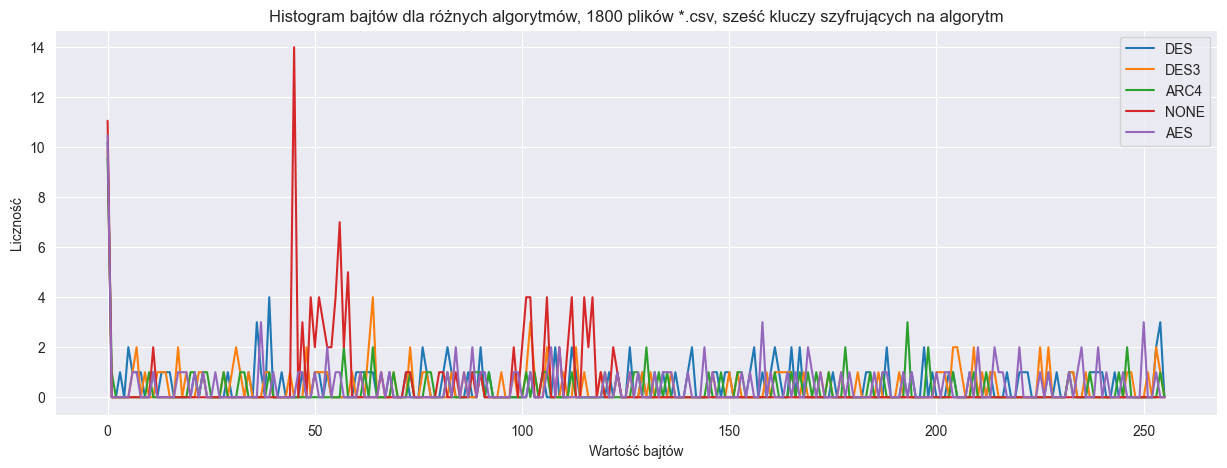

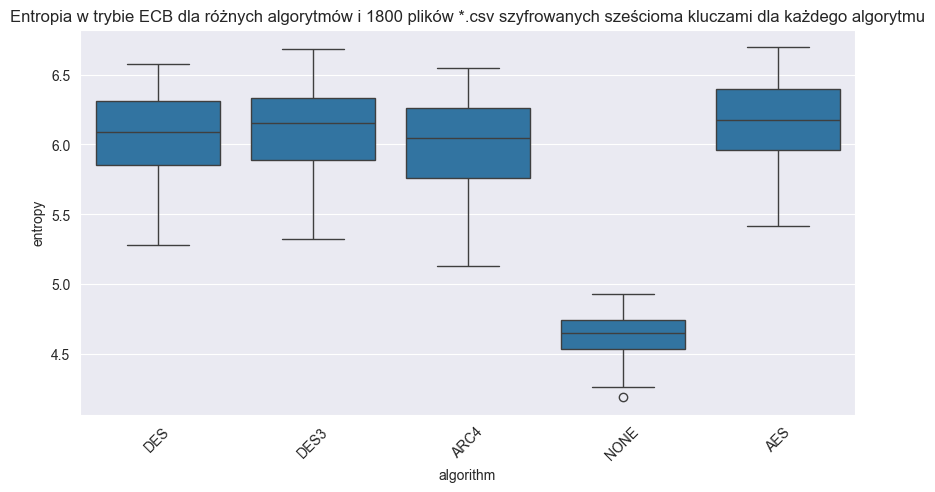

In [40]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_ecb_1800_6keys["algorithm"].unique()):
    subset = df_csv_ecb_1800_6keys[df_csv_ecb_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.csv, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_ecb_1800_6keys["algorithm"], y=df_csv_ecb_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.csv szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [23]:
df_html_ecb_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_html_ecb.csv'))
df_html_ecb_1800_6keys

file_name    format   entropy        mean     variance  \
0     file0674.html.enc  html_ecb  7.926916  128.983759  5404.915629   
1     file0412.html.enc  html_ecb  7.895653  127.500919  5406.335477   
2     file0413.html.enc  html_ecb  7.965608  127.315951  5408.804645   
3     file0675.html.enc  html_ecb  7.956759  128.020266  5388.984187   
4     file0588.html.enc  html_ecb  7.956480  126.265000  5334.413741   
...                 ...       ...       ...         ...          ...   
1795  file0296.html.enc  html_ecb  7.974892  127.717055  5532.366933   
1796  file0205.html.enc  html_ecb  7.941012  129.273399  5409.375376   
1797  file0063.html.enc  html_ecb  7.951605  127.036424  5450.371604   
1798  file0062.html.enc  html_ecb  7.974435  125.989982  5403.388506   
1799  file0204.html.enc  html_ecb  7.980061  126.500318  5448.742572   

        std_dev  skewness  kurtosis  energy        rms  ...  histogram_247  \
0     73.518131 -0.038194 -1.189884  363390  10.266038  ...             14   
1     73.527787 -0.006685 -1.182184  228600  10.249641  ...              6   
2     73.544576 -0.001727 -1.205282  963936  10.276288  ...             35   
3     73.409701 -0.022889 -1.174403  658649  10.333676  ...             21   
4     73.037071  0.015758 -1.165726  612867  10.279432  ...             18   
...         ...       ...       ...     ...        ...  ...            ...   
1795  74.379883 -0.003293 -1.210410  766113  10.191450  ...             23   
1796  73.548456 -0.003337 -1.187548  340998  10.246320  ...             11   
1797  73.826632  0.003938 -1.201273  509002  10.263519  ...             21   
1798  73.507745  0.032749 -1.182400  705043  10.267381  ...             13   
1799  73.815598  0.011435 -1.198972  991905  10.259292  ...             34   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                13              4             13              7   
1                13              6              7             10   
2                37             29             26             32   
3                31             23             28             27   
4                23             24             30             25   
...             ...            ...            ...            ...   
1795             36             35             23             32   
1796              9              9             12             14   
1797             13             10             27             11   
1798             23             34             17             28   
1799             34             40             33             28   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                12             18             10              7        DES  
1                10              7              4              3        DES  
2                24             41             24             39        DES  
3                19             18             19             18        DES  
4                19             20             26             17        DES  
...             ...            ...            ...            ...        ...  
1795             36             31             27             32        AES  
1796             10             14             12             20        AES  
1797             19             24             13             24        AES  
1798             25             25             36             23        AES  
1799             47             27             38             41        AES  

[1800 rows x 267 columns]

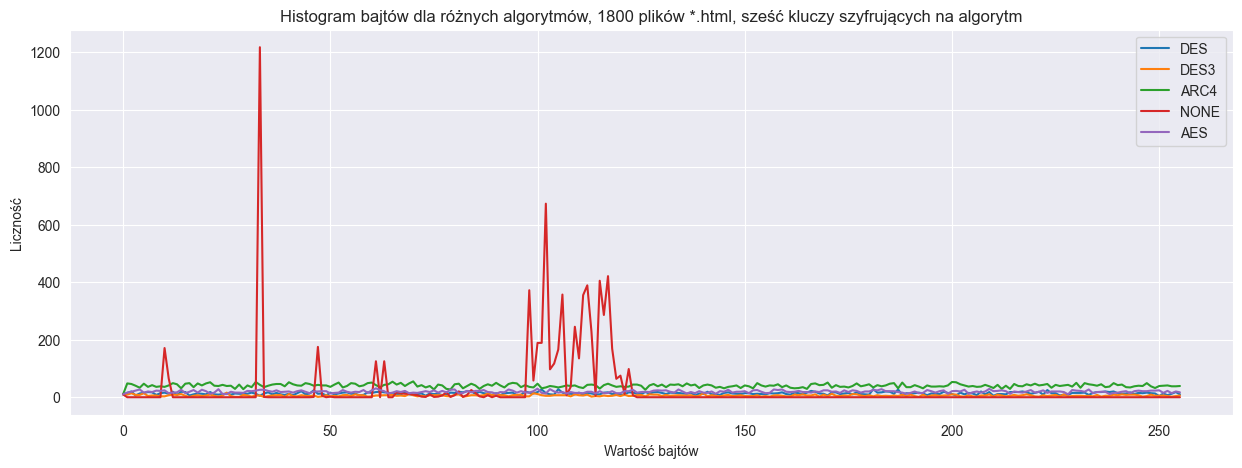

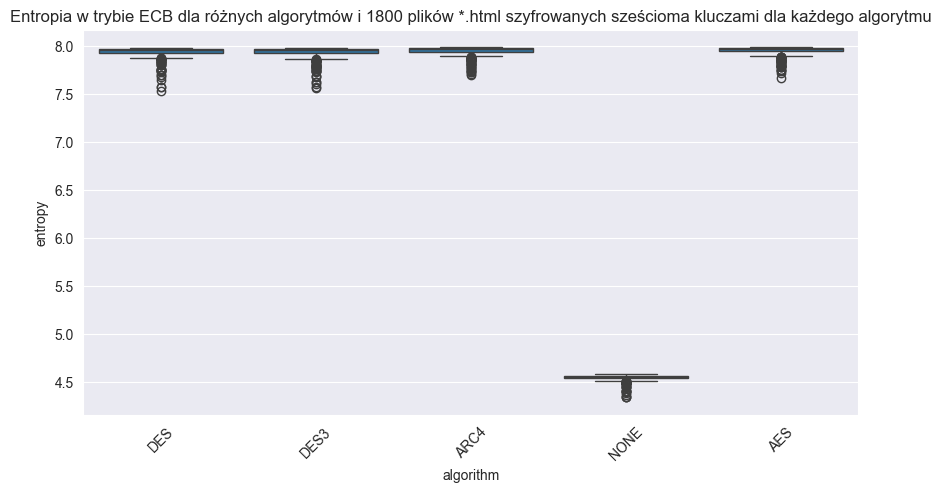

In [42]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_ecb_1800_6keys["algorithm"].unique()):
    subset = df_html_ecb_1800_6keys[df_html_ecb_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.html, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_ecb_1800_6keys["algorithm"], y=df_html_ecb_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.html szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [24]:
df_pyth_ecb_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_pyth_ecb.csv'))
df_pyth_ecb_1800_6keys

file_name    format   entropy        mean     variance    std_dev  \
0     file0380.py.enc  pyth_ecb  7.848456  127.738470  5498.000781  74.148505   
1     file0666.py.enc  pyth_ecb  7.848850  128.656750  5381.814684  73.360853   
2     file0605.py.enc  pyth_ecb  7.860967  128.320720  5570.281067  74.634316   
3     file0705.py.enc  pyth_ecb  7.847644  126.684350  5506.022381  74.202577   
4     file0678.py.enc  pyth_ecb  7.847267  129.456424  5255.859655  72.497308   
...               ...       ...       ...         ...          ...        ...   
1795  file0075.py.enc  pyth_ecb  7.977703  126.207095  5423.122990  73.641856   
1796  file0108.py.enc  pyth_ecb  7.954507  127.091263  5588.806982  74.758324   
1797  file0008.py.enc  pyth_ecb  7.794591  125.849781  5349.919320  73.143143   
1798  file0116.py.enc  pyth_ecb  7.975323  128.263078  5497.447518  74.144774   
1799  file0016.py.enc  pyth_ecb  7.802321  124.108333  5410.796597  73.558117   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.017209 -1.193700  762940  10.357366  ...             20   
1    -0.031454 -1.188800  488676  10.416248  ...              9   
2    -0.010140 -1.184598  728501  10.160985  ...             23   
3    -0.004362 -1.233750  312376  10.177079  ...              9   
4    -0.048788 -1.165679  440979  10.478813  ...             10   
...        ...       ...     ...        ...  ...            ...   
1795  0.015044 -1.180675  932117  10.245396  ...             32   
1796  0.001196 -1.197583  479166  10.179679  ...             22   
1797  0.028394 -1.199419   97167  10.321955  ...              1   
1798  0.000249 -1.213113  693878  10.272134  ...             17   
1799  0.032900 -1.181355  103752  10.395913  ...              4   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                28             23             16             23   
1                13             19             19             17   
2                25             44             59             21   
3                10             25             10             10   
4                10             10             21             21   
...             ...            ...            ...            ...   
1795             24             40             32             30   
1796             19             20             21             20   
1797              4              0              4              1   
1798             25             33             31             32   
1799              6              2              6              6   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                20             23             27             25        DES  
1                11             14             11             22        DES  
2                61             52             24             31        DES  
3                11              5             10              9        DES  
4                 8             16             15              5        DES  
...             ...            ...            ...            ...        ...  
1795             45             29             40             26        AES  
1796             16             20             21             20        AES  
1797              6              4              2              1        AES  
1798             27             22             32             24        AES  
1799              2              2              1              4        AES  

[1800 rows x 267 columns]

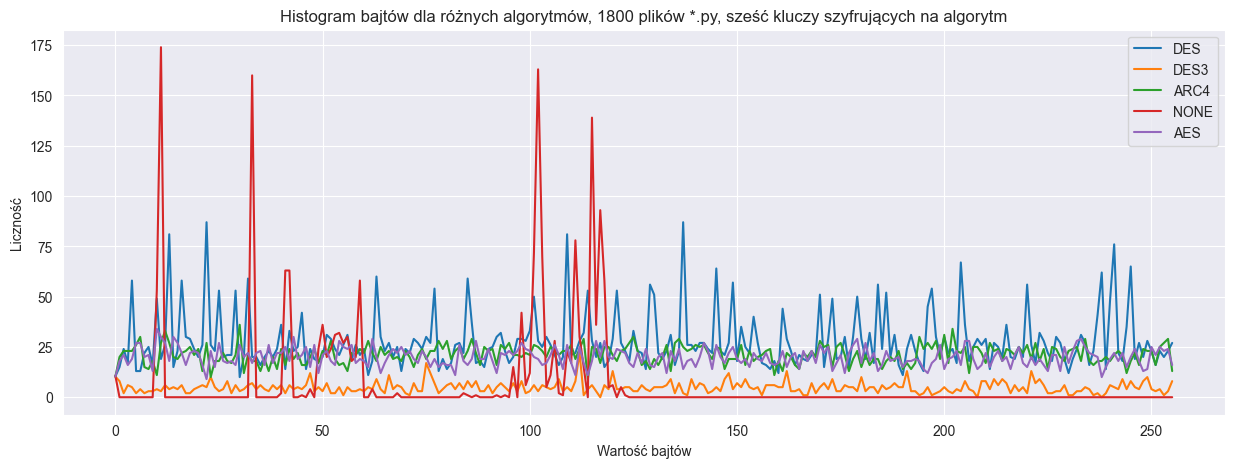

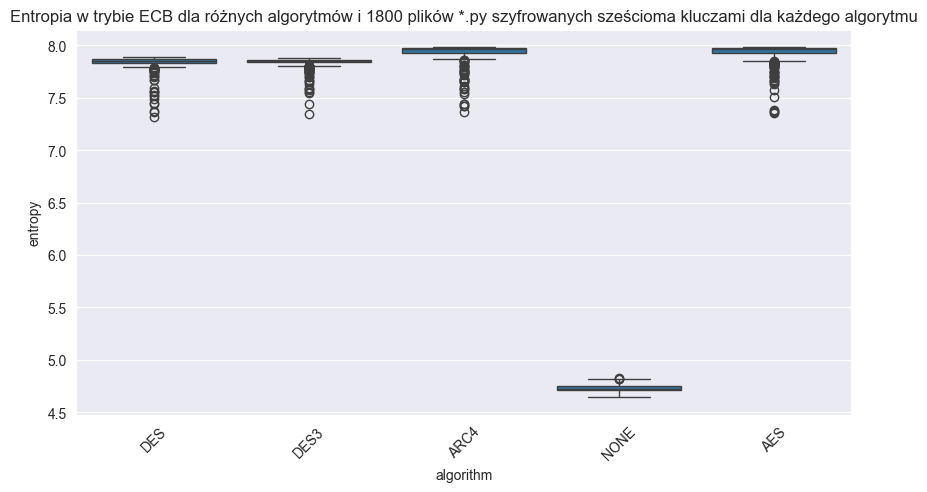

In [44]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_ecb_1800_6keys["algorithm"].unique()):
    subset = df_pyth_ecb_1800_6keys[df_pyth_ecb_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.py, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_ecb_1800_6keys["algorithm"], y=df_pyth_ecb_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.py szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [26]:
df_txt_ecb_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_txt_ecb.csv'))
df_txt_ecb_1800_6keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0712.txt.enc  txt_ecb  7.954571  127.711714  5570.495238  74.635750   
1     file0702.txt.enc  txt_ecb  7.956312  129.129677  5457.885820  73.877506   
2     file0474.txt.enc  txt_ecb  7.952469  126.718462  5451.282385  73.832800   
3     file0464.txt.enc  txt_ecb  7.934643  126.921528  5488.975787  74.087622   
4     file0416.txt.enc  txt_ecb  7.972640  127.630441  5492.408176  74.110783   
...                ...      ...       ...         ...          ...        ...   
1795  file0058.txt.enc  txt_ecb  7.899393  129.408120  5546.699891  74.476170   
1796  file0256.txt.enc  txt_ecb  7.979903  126.858750  5500.289026  74.163933   
1797  file0246.txt.enc  txt_ecb  7.981356  127.222788  5453.522268  73.847967   
1798  file0189.txt.enc  txt_ecb  7.961042  125.450955  5562.622161  74.582988   
1799  file0199.txt.enc  txt_ecb  7.887586  125.415179  5182.266615  71.987962   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.000505 -1.214700  411065  10.209084  ...             18   
1    -0.028154 -1.210878  488986  10.195641  ...             17   
2     0.018871 -1.186578  455505  10.240040  ...             21   
3     0.007566 -1.198594  305680  10.302373  ...             11   
4    -0.010423 -1.213082  773125  10.254680  ...             23   
...        ...       ...     ...        ...  ...            ...   
1795 -0.051198 -1.198201  191678  10.118898  ...              8   
1796  0.001958 -1.222249  925493  10.255226  ...             39   
1797  0.000346 -1.201340  948182  10.241454  ...             35   
1798  0.013066 -1.222911  489512  10.306838  ...             17   
1799  0.004191 -1.134019  142586  10.300038  ...              3   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                14             16             17             14   
1                27             19             21             11   
2                19             21             21             15   
3                12             11             10              8   
4                36             29             25             27   
...             ...            ...            ...            ...   
1795              8              9              4             10   
1796             40             45             34             23   
1797             36             38             24             29   
1798             19             20             16             18   
1799              2              1              7              6   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                15             12             22             22        DES  
1                21             23             17             22        DES  
2                13             17             15             21        DES  
3                13              9             10             14        DES  
4                24             29             16             24        DES  
...             ...            ...            ...            ...        ...  
1795              6              9              9             10        AES  
1796             42             22             31             24        AES  
1797             33             42             37             37        AES  
1798             14             21             10             23        AES  
1799              3              7              4              6        AES  

[1800 rows x 267 columns]

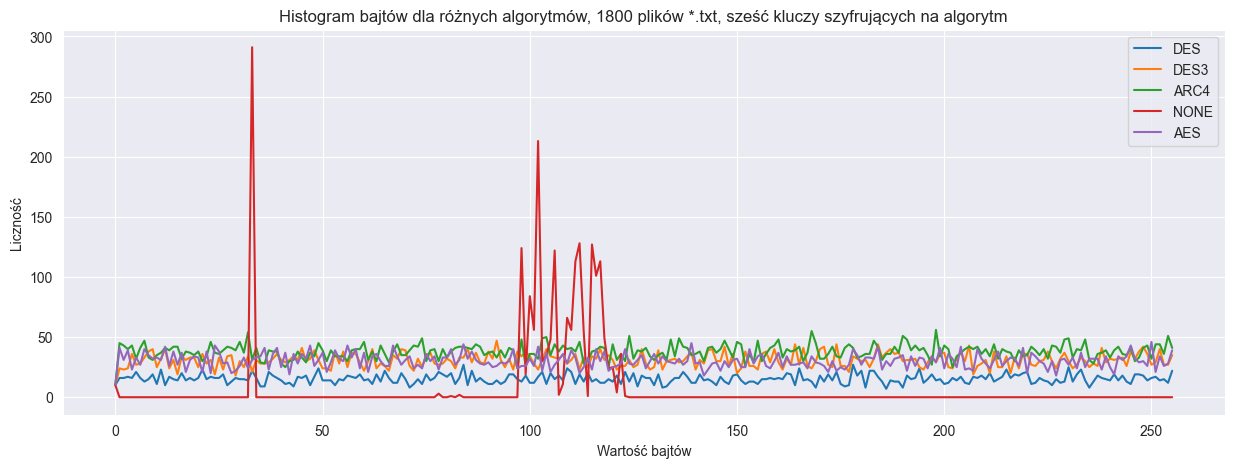

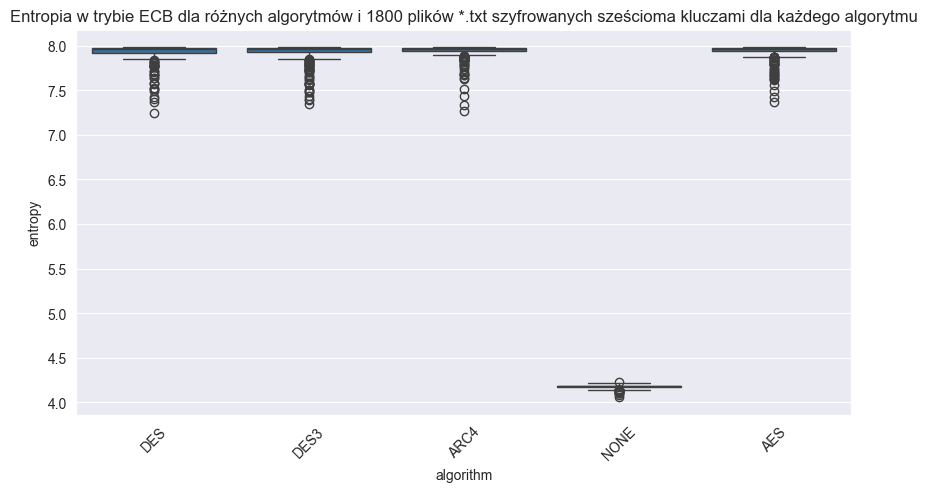

In [47]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_ecb_1800_6keys["algorithm"].unique()):
    subset = df_txt_ecb_1800_6keys[df_txt_ecb_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.txt, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_ecb_1800_6keys["algorithm"], y=df_txt_ecb_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.txt szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [27]:
df_wav_ecb_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1800/features_ecb_1800_6keys_csv/features_wav_ecb.csv'))
df_wav_ecb_1800_6keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0580.wav.enc  wav_ecb  7.997866  127.812154  5475.799351  73.998644   
1     file0590.wav.enc  wav_ecb  7.997907  127.810947  5451.500644  73.834278   
2     file0441.wav.enc  wav_ecb  7.998020  127.306313  5468.421017  73.948773   
3     file0539.wav.enc  wav_ecb  7.997956  127.526027  5482.544825  74.044209   
4     file0451.wav.enc  wav_ecb  7.997803  127.991794  5453.560041  73.848223   
...                ...      ...       ...         ...          ...        ...   
1795  file0211.wav.enc  wav_ecb  7.997932  127.375419  5446.992796  73.803745   
1796  file0263.wav.enc  wav_ecb  7.998816  127.540034  5467.665733  73.943666   
1797  file0273.wav.enc  wav_ecb  7.997877  126.978030  5443.843369  73.782406   
1798  file0105.wav.enc  wav_ecb  7.999009  127.401359  5462.227269  73.906882   
1799  file0115.wav.enc  wav_ecb  7.997990  127.648103  5459.220406  73.886537   

      skewness  kurtosis    energy        rms  ...  histogram_247  \
0    -0.003677 -1.205698   9278943  10.254083  ...            326   
1    -0.000382 -1.200628  18581620  10.262033  ...            686   
2     0.004234 -1.201894  37279050  10.278709  ...           1376   
3    -0.000203 -1.201102  27795528  10.248331  ...            993   
4    -0.008729 -1.200003  18646350  10.279892  ...            691   
...        ...       ...       ...        ...  ...            ...   
1795  0.007540 -1.198165   9288769  10.259046  ...            343   
1796 -0.000589 -1.201352  18633838  10.276442  ...            682   
1797  0.005961 -1.194442   9312785  10.272299  ...            307   
1798  0.003217 -1.200016  18621991  10.273175  ...            685   
1799 -0.004438 -1.200310   9320429  10.276514  ...            355   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0               344            401            323            330   
1               634            673            662            696   
2              1280           1420           1428           1312   
3              1077            993           1023           1011   
4               659            732            693            715   
...             ...            ...            ...            ...   
1795            325            374            334            351   
1796            675            680            726            732   
1797            340            357            325            327   
1798            640            674            709            680   
1799            332            298            338            335   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               334            361            349            343        DES  
1               776            742            724            710        DES  
2              1372           1400           1408           1408        DES  
3              1029           1055           1107           1059        DES  
4               667            684            640            711        DES  
...             ...            ...            ...            ...        ...  
1795            332            331            353            349        AES  
1796            684            691            653            684        AES  
1797            350            348            316            383        AES  
1798            726            696            712            673        AES  
1799            357            348            382            327        AES  

[1800 rows x 267 columns]

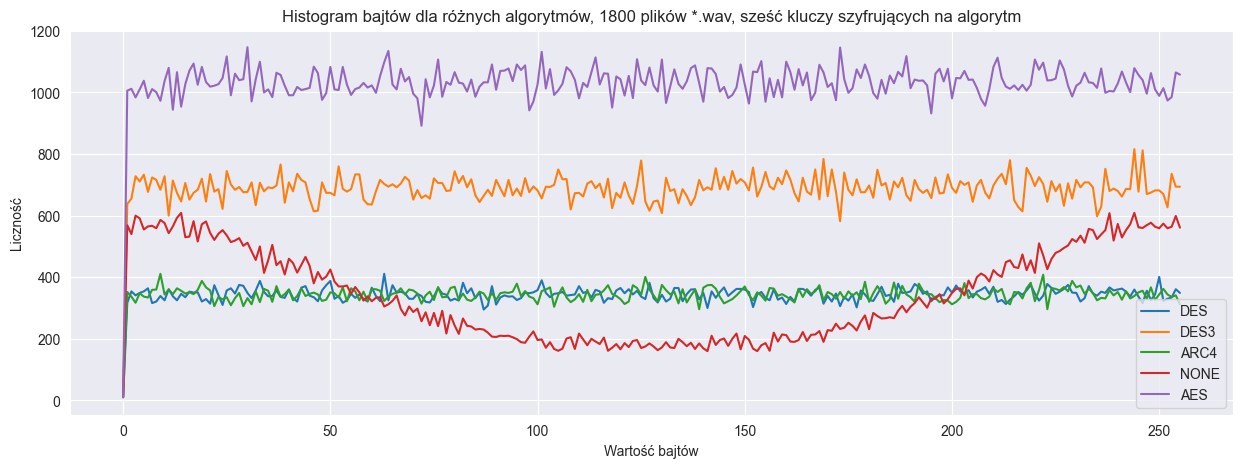

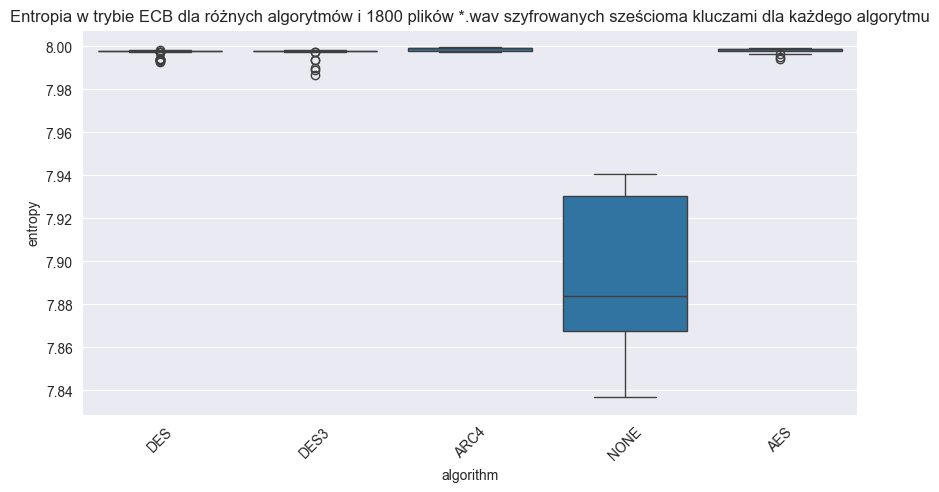

In [49]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_ecb_1800_6keys["algorithm"].unique()):
    subset = df_wav_ecb_1800_6keys[df_wav_ecb_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.wav, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_ecb_1800_6keys["algorithm"], y=df_wav_ecb_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.wav szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()